# Analyse Nino3.4 variance

Use preprocessed NINO34 average time series

CanESM5
MIROC6
CESM2

TODO: why is there a low value in the first timestep for CESM2??????

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #

# colors for lines (color blind friendly colors: https://gist.github.com/thriveth/8560036)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    


## set paths

In [2]:
# directories with processed output
basedir_processed_NINO34 = '/glade/scratch/milinski/ESGF_downloads/NINO34/'

# directory for saving plots
plotdir = './plots/nino34/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## load HadISST

In [3]:
file = basedir_processed_NINO34 + 'n34_HadISST_1981-2020.nc'
hadisst = xr.open_dataset(file)['N34']


## load MIROC6

In [4]:
var = 'tos'
model = 'MIROC6'
experiment = 'historical'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_Omon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 55.98it/s]


In [5]:
var = 'tos'
model = 'MIROC6'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 77.73it/s]


In [6]:
miroc6_nino34 = xr.concat([miroc6_historical_nino34,miroc6_ssp585_nino34],dim='time')[var]

## load CanESM5

In [7]:
var = 'tos'
model = 'CanESM5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 42.11it/s]


In [8]:
var = 'tos'
model = 'CanESM5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 40.18it/s]


In [9]:
canesm5_nino34 = xr.concat([canesm5_historical_nino34,canesm5_ssp585_nino34],dim='time')[var]

## load CESM2-LENS

In [10]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BHISTcmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)

cesm2_historical_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 50/50 [00:01<00:00, 31.74it/s]


In [11]:
# remove the member that is not available for ssp370 from historical so that timeseries can be merged
cesm2_historical_nino34 = cesm2_historical_nino34['SST'][list(np.arange(0,10))+list(np.arange(11,50)),:] 

In [12]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BSSP370cmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(list(np.arange(1,11))+list(np.arange(12,51))):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).SST.squeeze()
    ds.append(member)
#     print(len(member['time']))
#

cesm2_ssp370_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 49/49 [00:00<00:00, 58.81it/s]


In [13]:
cesm2_nino34 = xr.concat([cesm2_historical_nino34,cesm2_ssp370_nino34],dim='time')
cesm2_nino34 = cesm2_nino34-273.15 # K to °C

In [14]:
# time axis in CESM is shifted by 1 month. Use CanESM5 time series instead (easier than shifting)
cesm2_nino34['time'] = canesm5_nino34['time']

In [15]:
cesm2_nino34

<xarray.DataArray 'SST' (ensemble: 49, time: 3012)>
array([[25.9116074 , 26.37951846, 27.12976234, ..., 29.43489812,
        29.61828304, 30.03021084],
       [26.26008526, 26.65967333, 27.15691281, ..., 33.30085733,
        33.47057368, 33.73404029],
       [26.83061716, 26.87028873, 26.93147542, ..., 31.22305174,
        31.65392602, 32.37060367],
       ...,
       [27.3463803 , 27.83655751, 28.60264463, ..., 28.41625742,
        28.64610641, 29.22446246],
       [27.36969651, 27.5104853 , 27.90061307, ..., 31.201936  ,
        31.6952367 , 32.26922065],
       [27.3183281 , 27.74289357, 28.13295356, ..., 31.04424785,
        30.86037754, 31.32968258]])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Dimensions without coordinates: ensemble

## load IPSL-CM6A-LR

In [16]:
var = 'tos'
model = 'IPSL-CM6A-LR'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,12)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ipsl_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 11/11 [00:00<00:00, 38.54it/s]


In [17]:
var = 'tos'
model = 'IPSL-CM6A-LR'
experiment = 'ssp370'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,12)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ipsl_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 11/11 [00:00<00:00, 64.13it/s]


In [18]:
ipsl_nino34 = xr.concat([ipsl_historical_nino34,ipsl_ssp370_nino34],dim='time')[var]

## load CNRM-CM6-1

In [19]:
var = 'tos'
model = 'CNRM-CM6-1'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,7)):
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cnrm_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 6/6 [00:00<00:00, 53.85it/s]


In [20]:
var = 'tos'
model = 'CNRM-CM6-1'
experiment = 'ssp370'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,7)):
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cnrm_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 6/6 [00:00<00:00, 78.18it/s]


In [21]:
cnrm_nino34 = xr.concat([cnrm_historical_nino34,cnrm_ssp370_nino34],dim='time')[var]

## load ACCESS-ESM1-5

In [53]:
var = 'tos'
model = 'ACCESS-ESM1-5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)): # has 30 historical members
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


access_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 10/10 [00:00<00:00, 81.33it/s]


In [54]:
var = 'tos'
model = 'ACCESS-ESM1-5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


access_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 10/10 [00:00<00:00, 84.45it/s]


In [55]:
access_nino34 = xr.concat([access_historical_nino34,access_ssp370_nino34],dim='time')[var]

## compute DJF statistics

In [56]:
canesm5_nino34_DJF = canesm5_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
miroc6_nino34_DJF = miroc6_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
cesm2_nino34_DJF = cesm2_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
ipsl_nino34_DJF = ipsl_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
cnrm_nino34_DJF = cnrm_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
access_nino34_DJF = access_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3

## plots

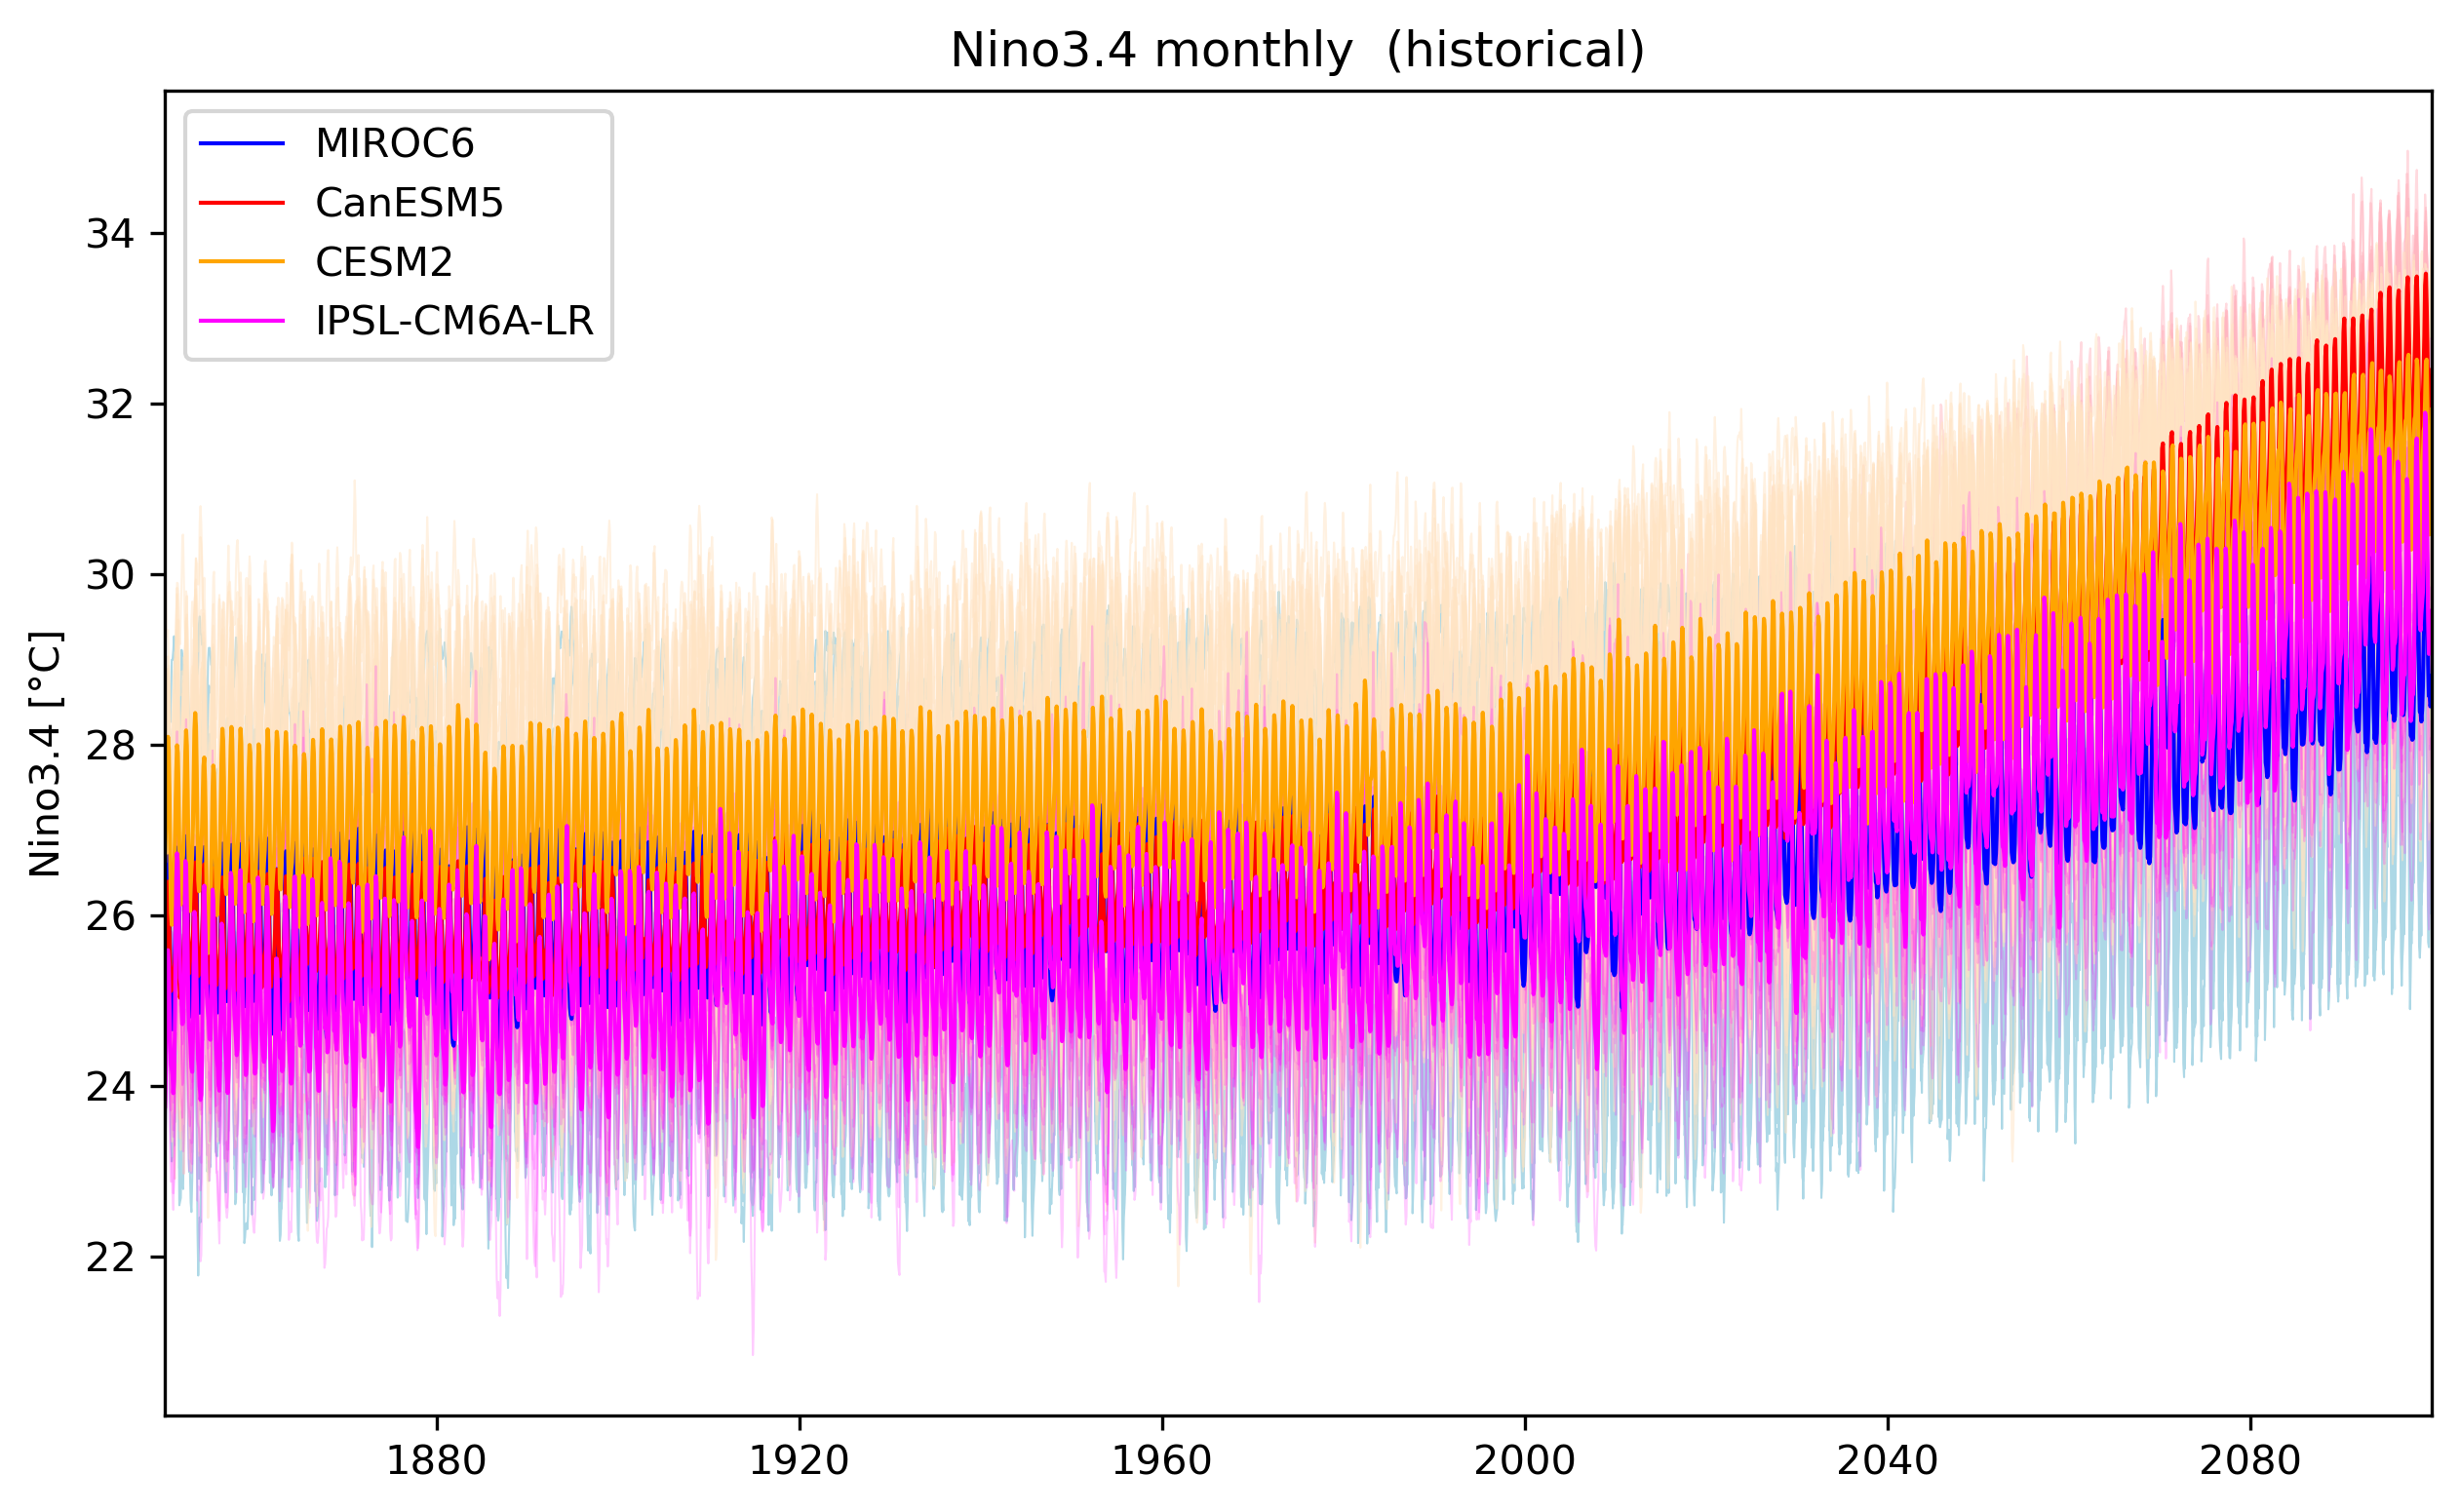

In [57]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34['time'].values,miroc6_nino34.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.transpose(),color='lightpink',alpha=0.5,linewidth=0.5);
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.transpose(),color='bisque',alpha=0.5,linewidth=0.5);
plt.plot(ipsl_nino34['time'].values,ipsl_nino34.transpose(),color='magenta',alpha=0.2,linewidth=0.5);


plt.plot(miroc6_nino34['time'].values,miroc6_nino34.mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.mean(dim='ensemble'),color='orange',linewidth=1,label='CESM2');
plt.plot(ipsl_nino34['time'].values,ipsl_nino34.mean(dim='ensemble'),color='magenta',linewidth=1,label='IPSL-CM6A-LR');



plt.legend()
plt.title('Nino3.4 monthly  (historical)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly.png', bbox_inches='tight', dpi=300)

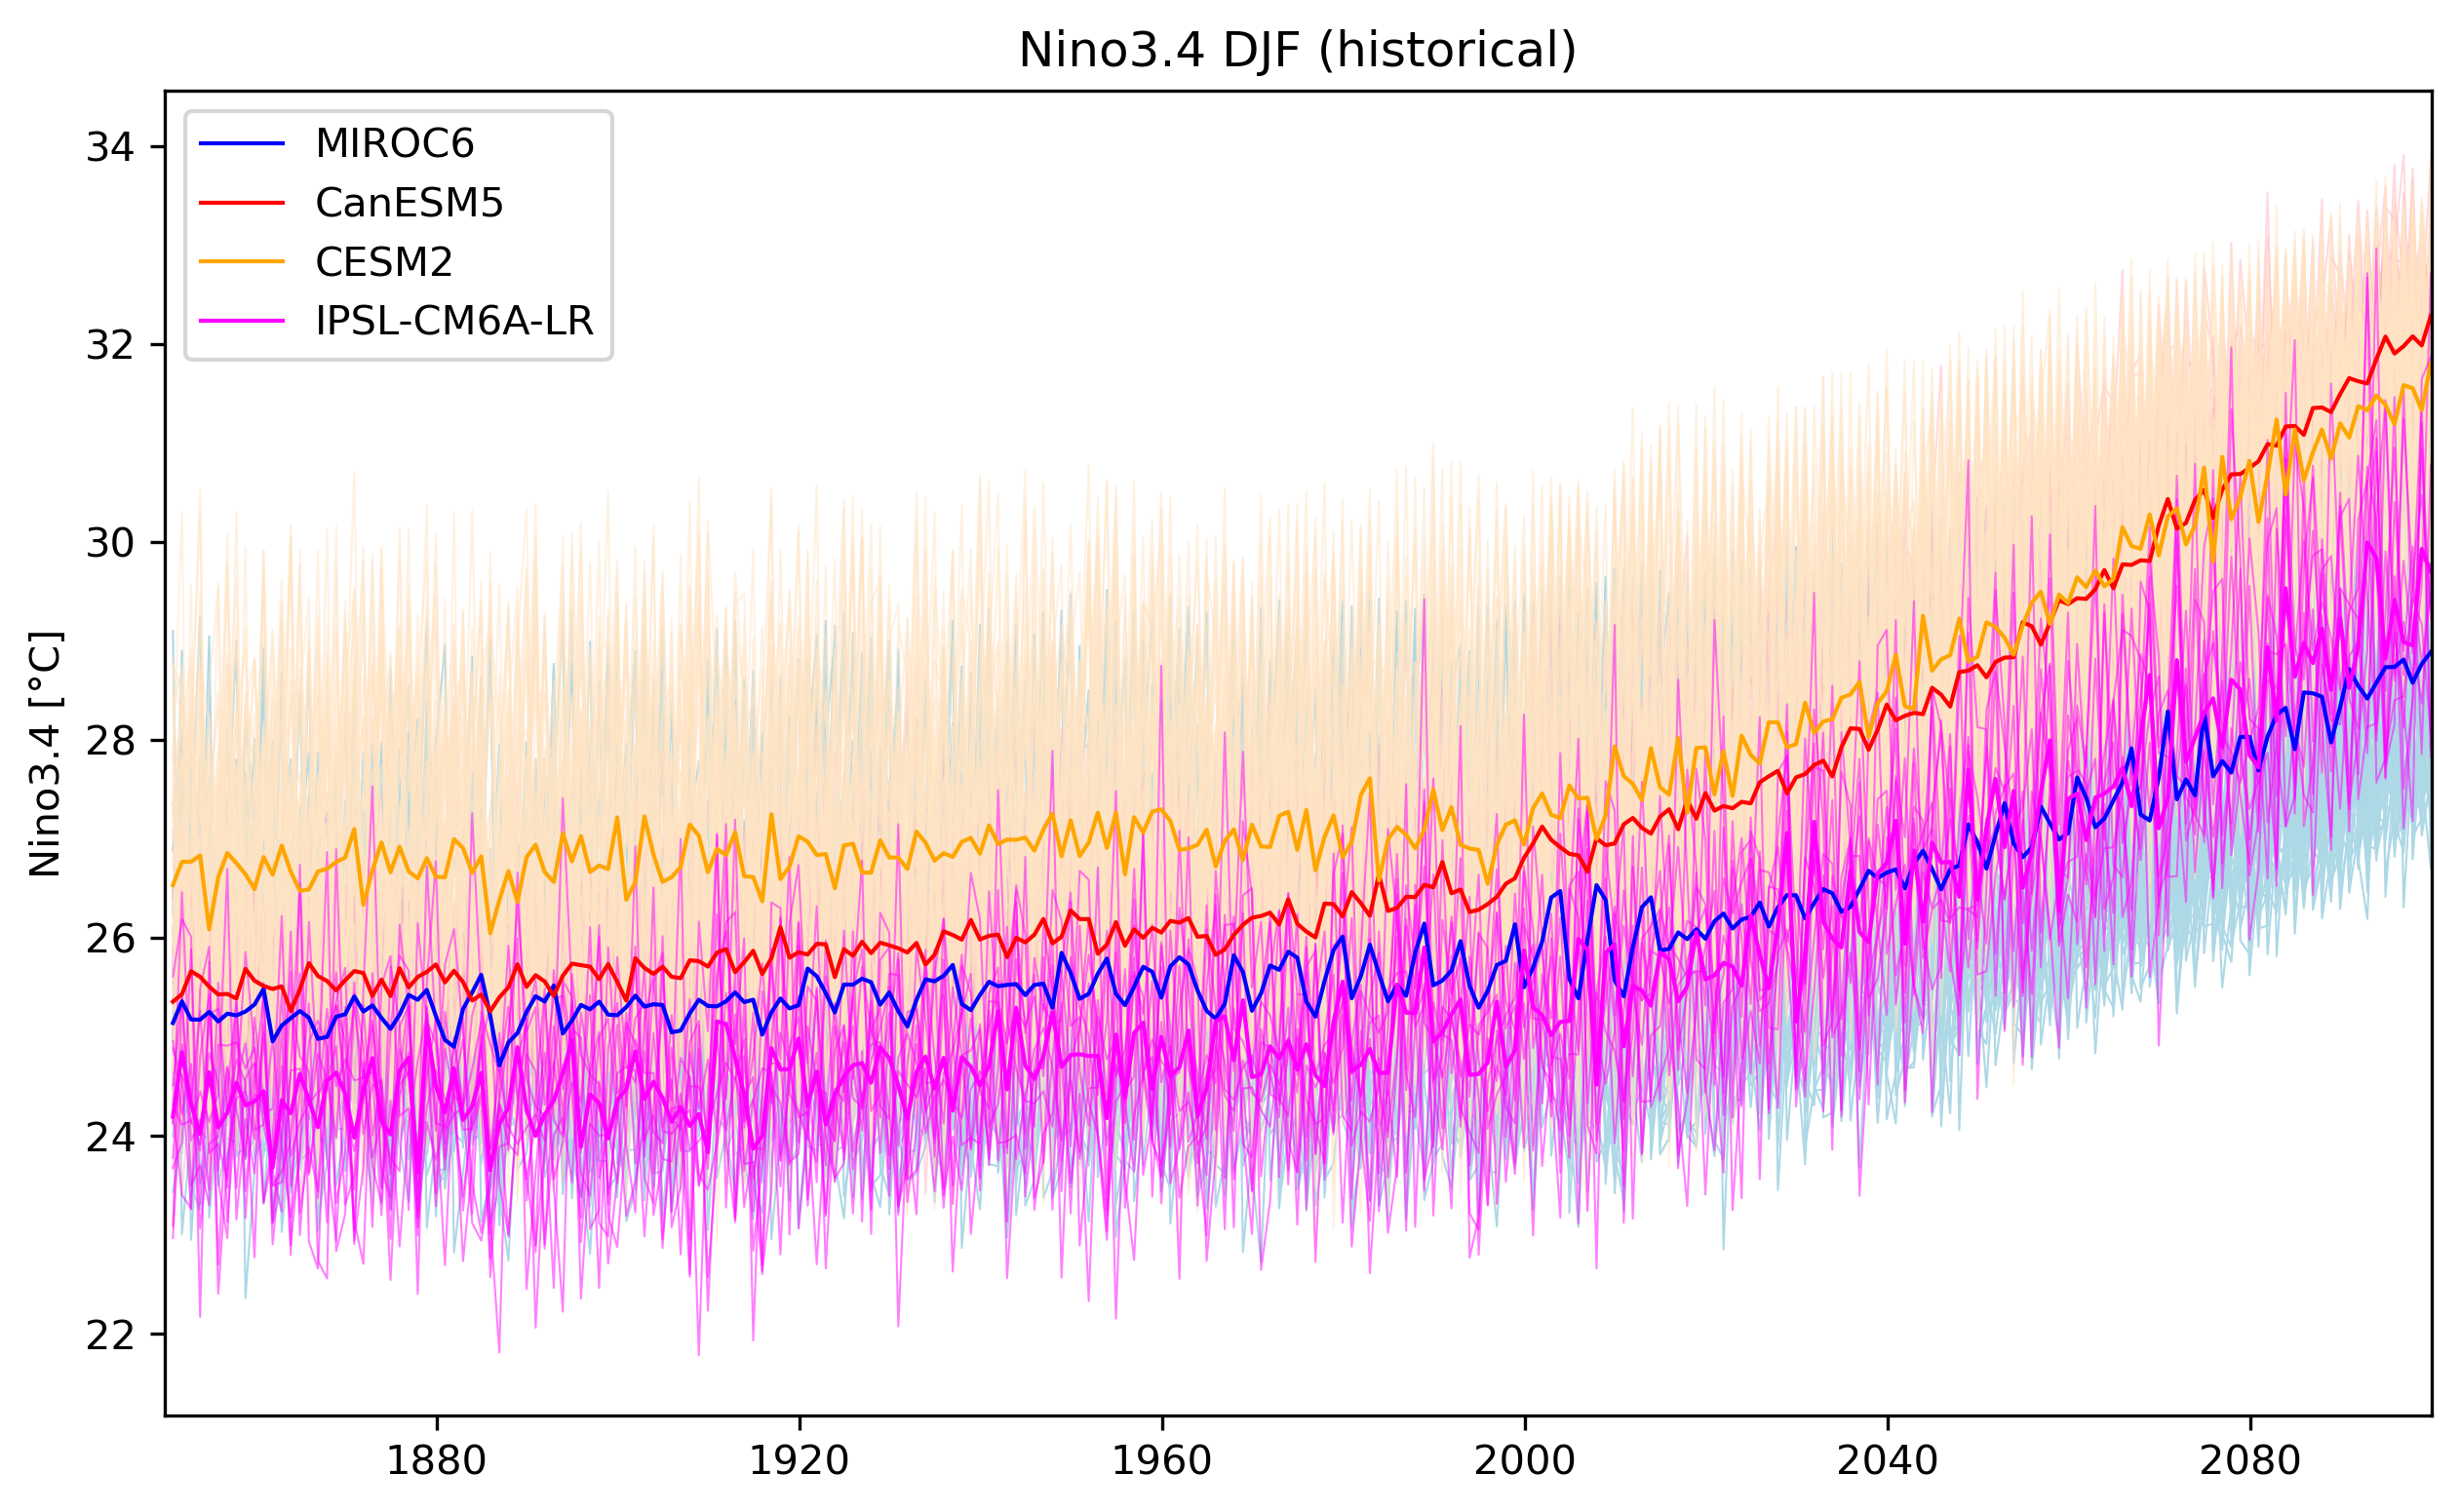

In [24]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.transpose(),color='lightpink',linewidth=0.5,alpha=0.5);
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.transpose(),color='bisque',linewidth=0.5,alpha=0.5);
plt.plot(ipsl_nino34_DJF['time'].values,ipsl_nino34_DJF.transpose(),color='magenta',linewidth=0.5,alpha=0.5);

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.mean(dim='ensemble'),color='orange',linewidth=1,label='CESM2');
plt.plot(ipsl_nino34_DJF['time'].values,ipsl_nino34_DJF.mean(dim='ensemble'),color='magenta',linewidth=1,label='IPSL-CM6A-LR');


plt.legend()
plt.title('Nino3.4 DJF (historical)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF.png', bbox_inches='tight', dpi=300)

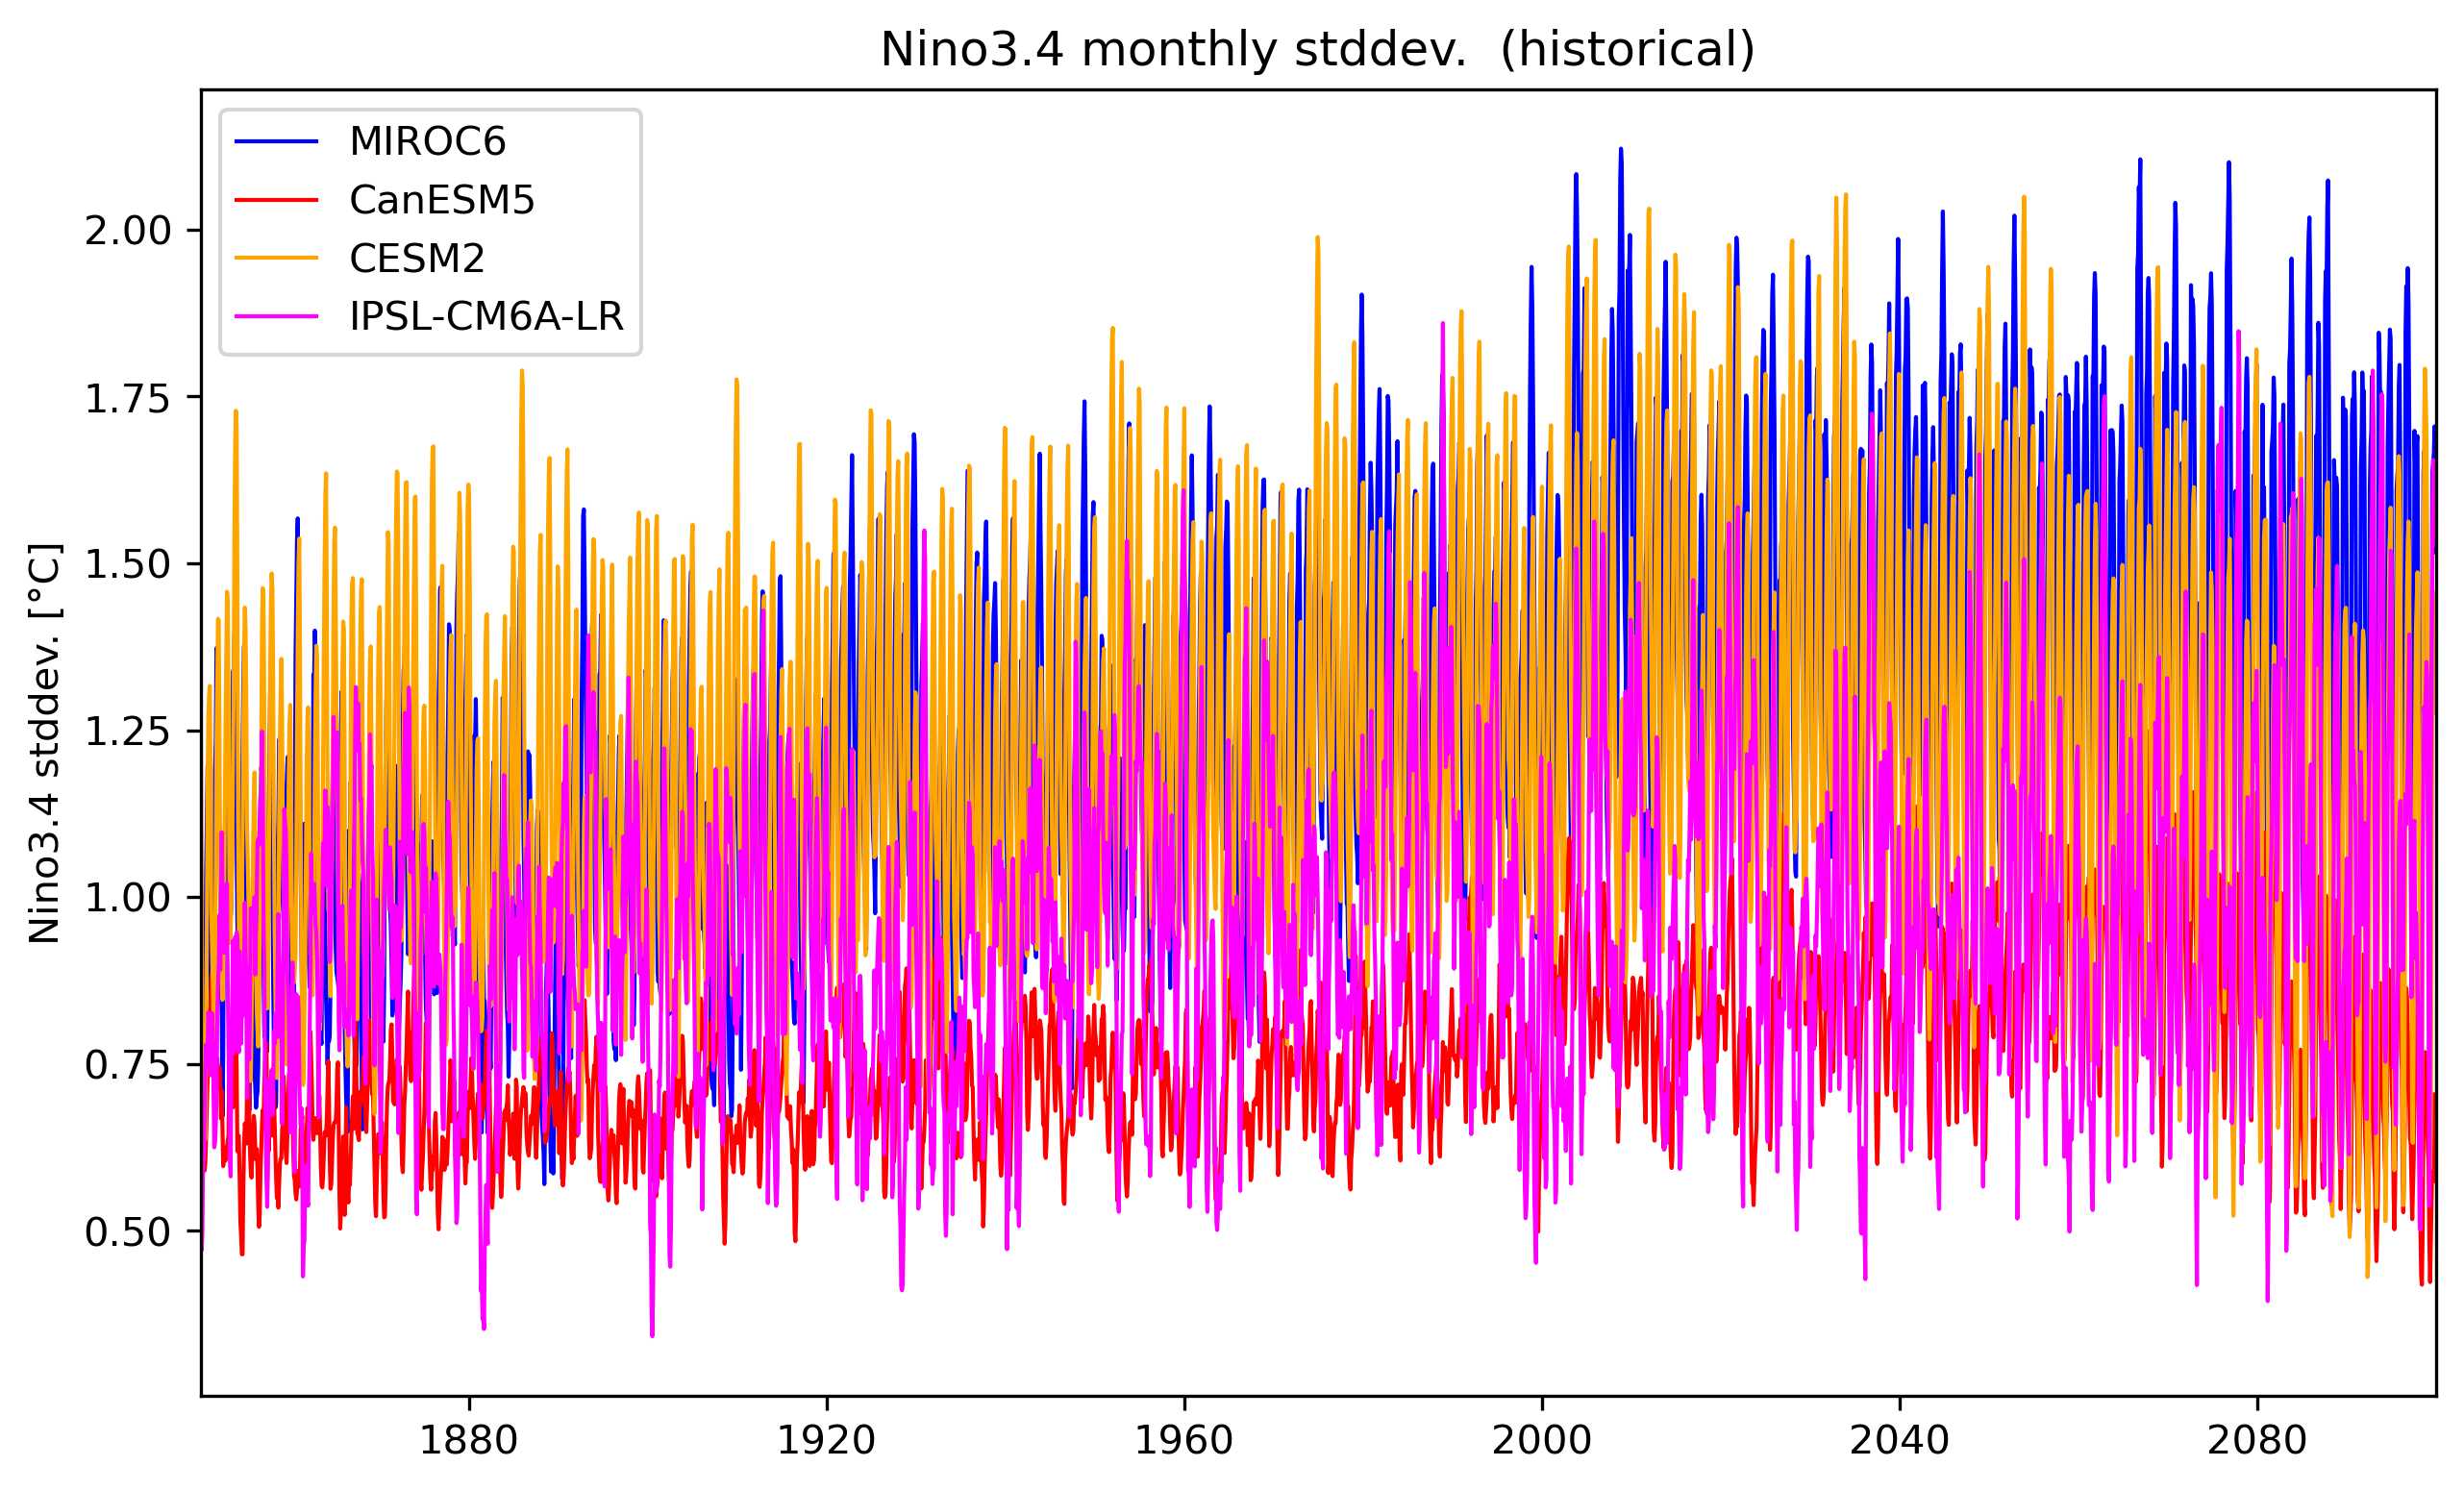

In [25]:
# time series
plt.figure(figsize=(10, 6), dpi=300)


plt.plot(miroc6_nino34['time'].values,miroc6_nino34.std(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.std(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.std(dim='ensemble'),color='orange',linewidth=1,label='CESM2');
plt.plot(ipsl_nino34['time'].values,ipsl_nino34.std(dim='ensemble'),color='magenta',linewidth=1,label='IPSL-CM6A-LR');



plt.legend()
plt.title('Nino3.4 monthly stddev.  (historical)')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly_stddev.png', bbox_inches='tight', dpi=300)

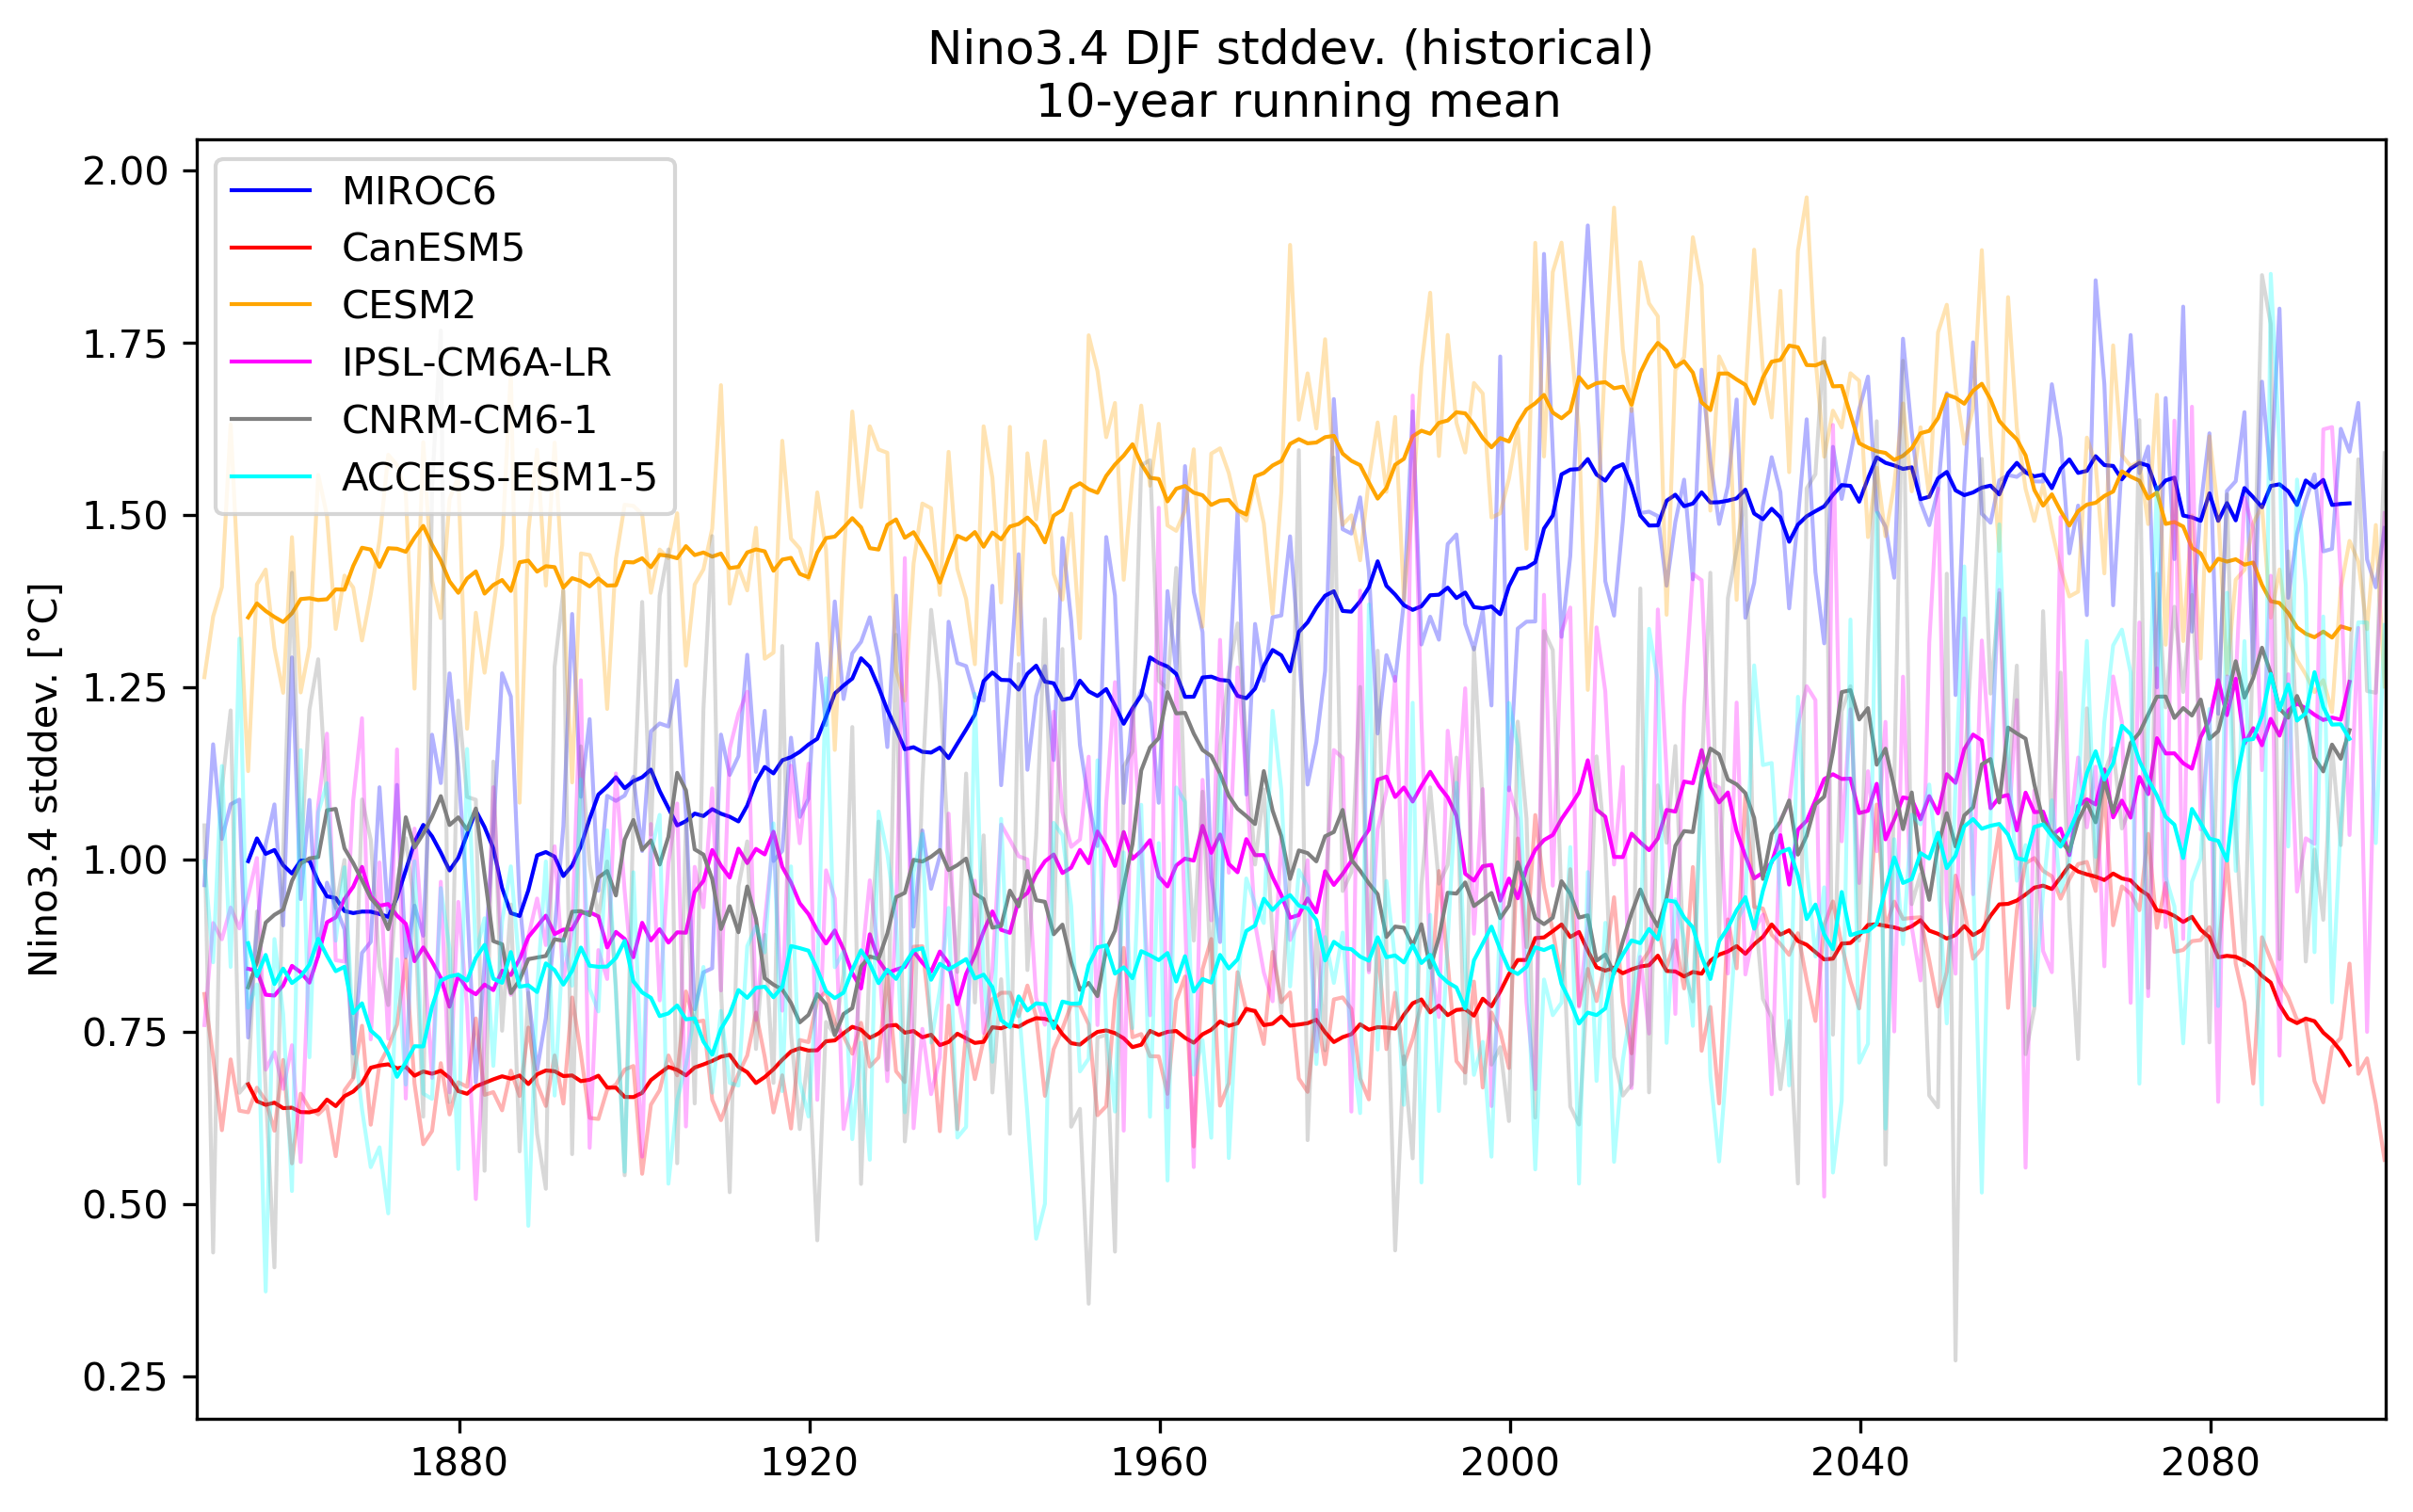

In [60]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

runmean_length=10

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.std(dim='ensemble'),color='blue',linewidth=1,alpha=0.3,label='');
plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length, center=True).mean(),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.std(dim='ensemble'),color='red',linewidth=1,alpha=0.3,label='');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length,center=True).mean(),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.std(dim='ensemble'),color='orange',linewidth=1,alpha=0.3,label='');
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length,center=True).mean(),color='orange',linewidth=1,label='CESM2');
plt.plot(ipsl_nino34_DJF['time'].values,ipsl_nino34_DJF.std(dim='ensemble'),color='magenta',linewidth=1,alpha=0.3,label='');
plt.plot(ipsl_nino34_DJF['time'].values,ipsl_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length,center=True).mean(),color='magenta',linewidth=1,label='IPSL-CM6A-LR');
plt.plot(cnrm_nino34_DJF['time'].values,cnrm_nino34_DJF.std(dim='ensemble'),color='grey',linewidth=1,alpha=0.3,label='');
plt.plot(cnrm_nino34_DJF['time'].values,cnrm_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length,center=True).mean(),color='grey',linewidth=1,label='CNRM-CM6-1');
plt.plot(access_nino34_DJF['time'].values,access_nino34_DJF.std(dim='ensemble'),color='cyan',linewidth=1,alpha=0.3,label='');
plt.plot(access_nino34_DJF['time'].values,access_nino34_DJF.std(dim='ensemble').rolling(time=runmean_length,center=True).mean(),color='cyan',linewidth=1,label='ACCESS-ESM1-5');



plt.legend()
plt.title('Nino3.4 DJF stddev. (historical)\n '+str(runmean_length)+'-year running mean')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF_stddev.png', bbox_inches='tight', dpi=300)

## std change by month

In [27]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]
years = np.arange(1850,2101,1)
runmean_length = 10 #running mean off when set to 1

In [61]:
canesm5_nino34_std_bymonth = canesm5_nino34.std(dim='ensemble').groupby('time.month')
miroc6_nino34_std_bymonth = miroc6_nino34.std(dim='ensemble').groupby('time.month')
cesm2_nino34_std_bymonth = cesm2_nino34.std(dim='ensemble').groupby('time.month')
ipsl_nino34_std_bymonth = ipsl_nino34.std(dim='ensemble').groupby('time.month')
cnrm_nino34_std_bymonth = cnrm_nino34.std(dim='ensemble').groupby('time.month')
access_nino34_std_bymonth = access_nino34.std(dim='ensemble').groupby('time.month')

In [62]:
canesm5_nino34_std_bymonth_array = np.array([canesm5_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

miroc6_nino34_std_bymonth_array = np.array([miroc6_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

cesm2_nino34_std_bymonth_array = np.array([cesm2_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

ipsl_nino34_std_bymonth_array = np.array([ipsl_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

cnrm_nino34_std_bymonth_array = np.array([cnrm_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

access_nino34_std_bymonth_array = np.array([access_nino34_std_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          access_nino34_std_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

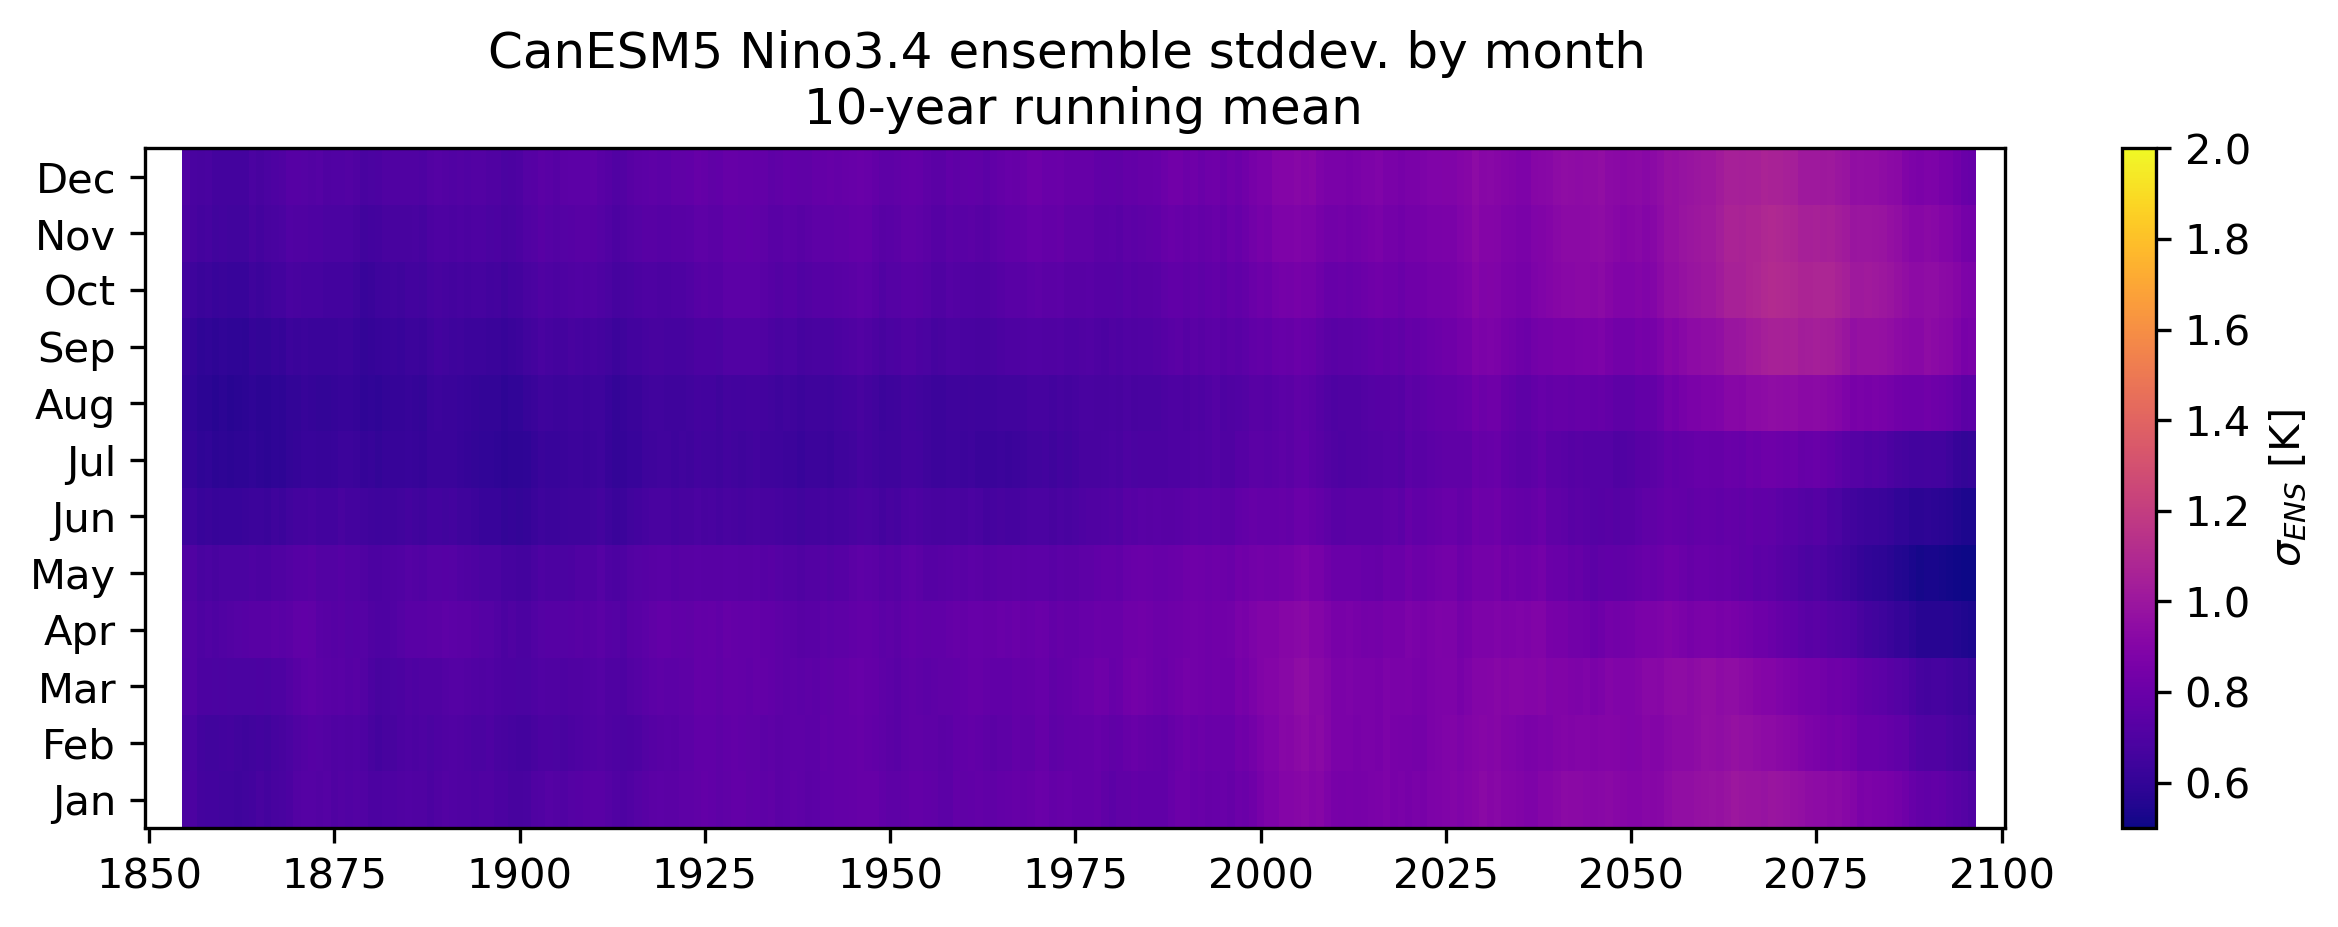

In [30]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(canesm5_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)

axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('CanESM5 Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_CanESM5.png', bbox_inches='tight', dpi=300)

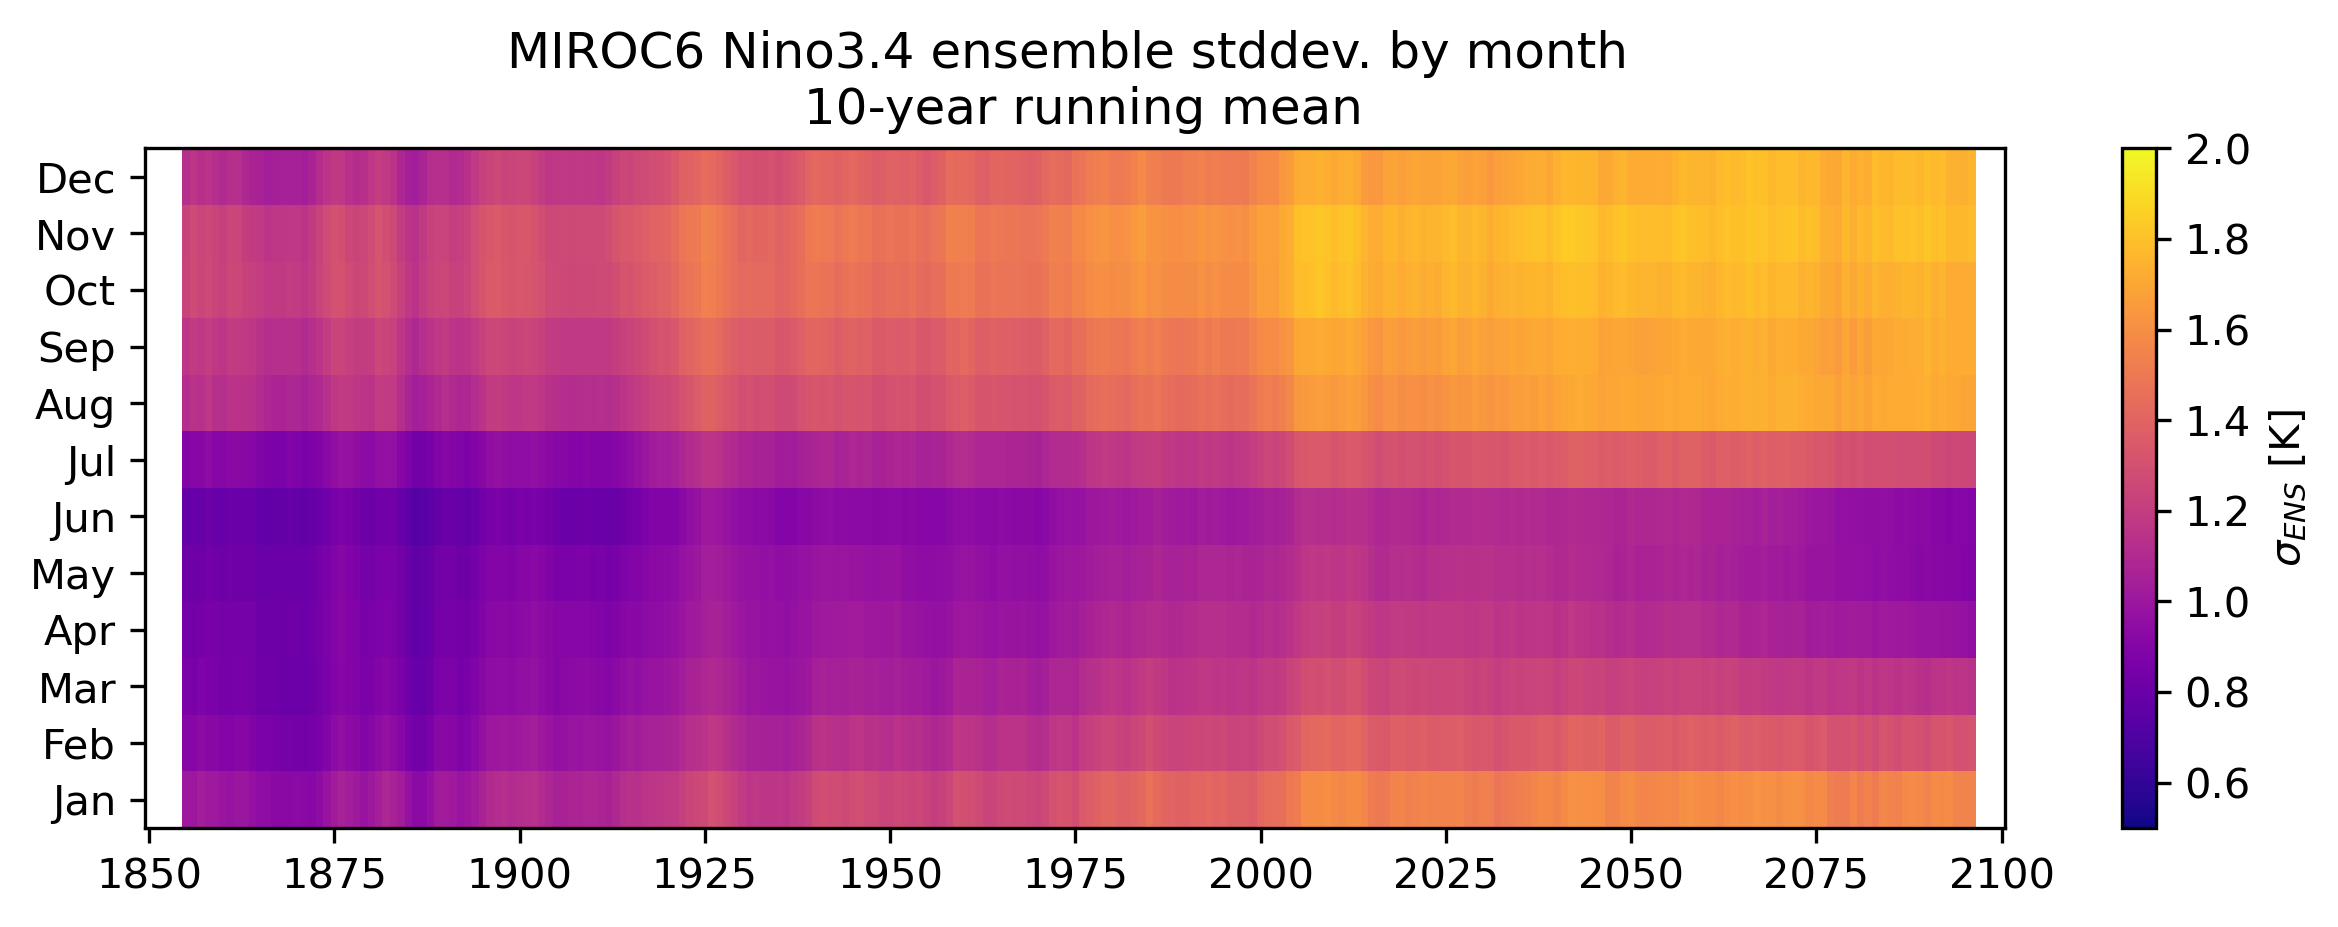

In [31]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(miroc6_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('MIROC6 Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_MIROC6.png', bbox_inches='tight', dpi=300)

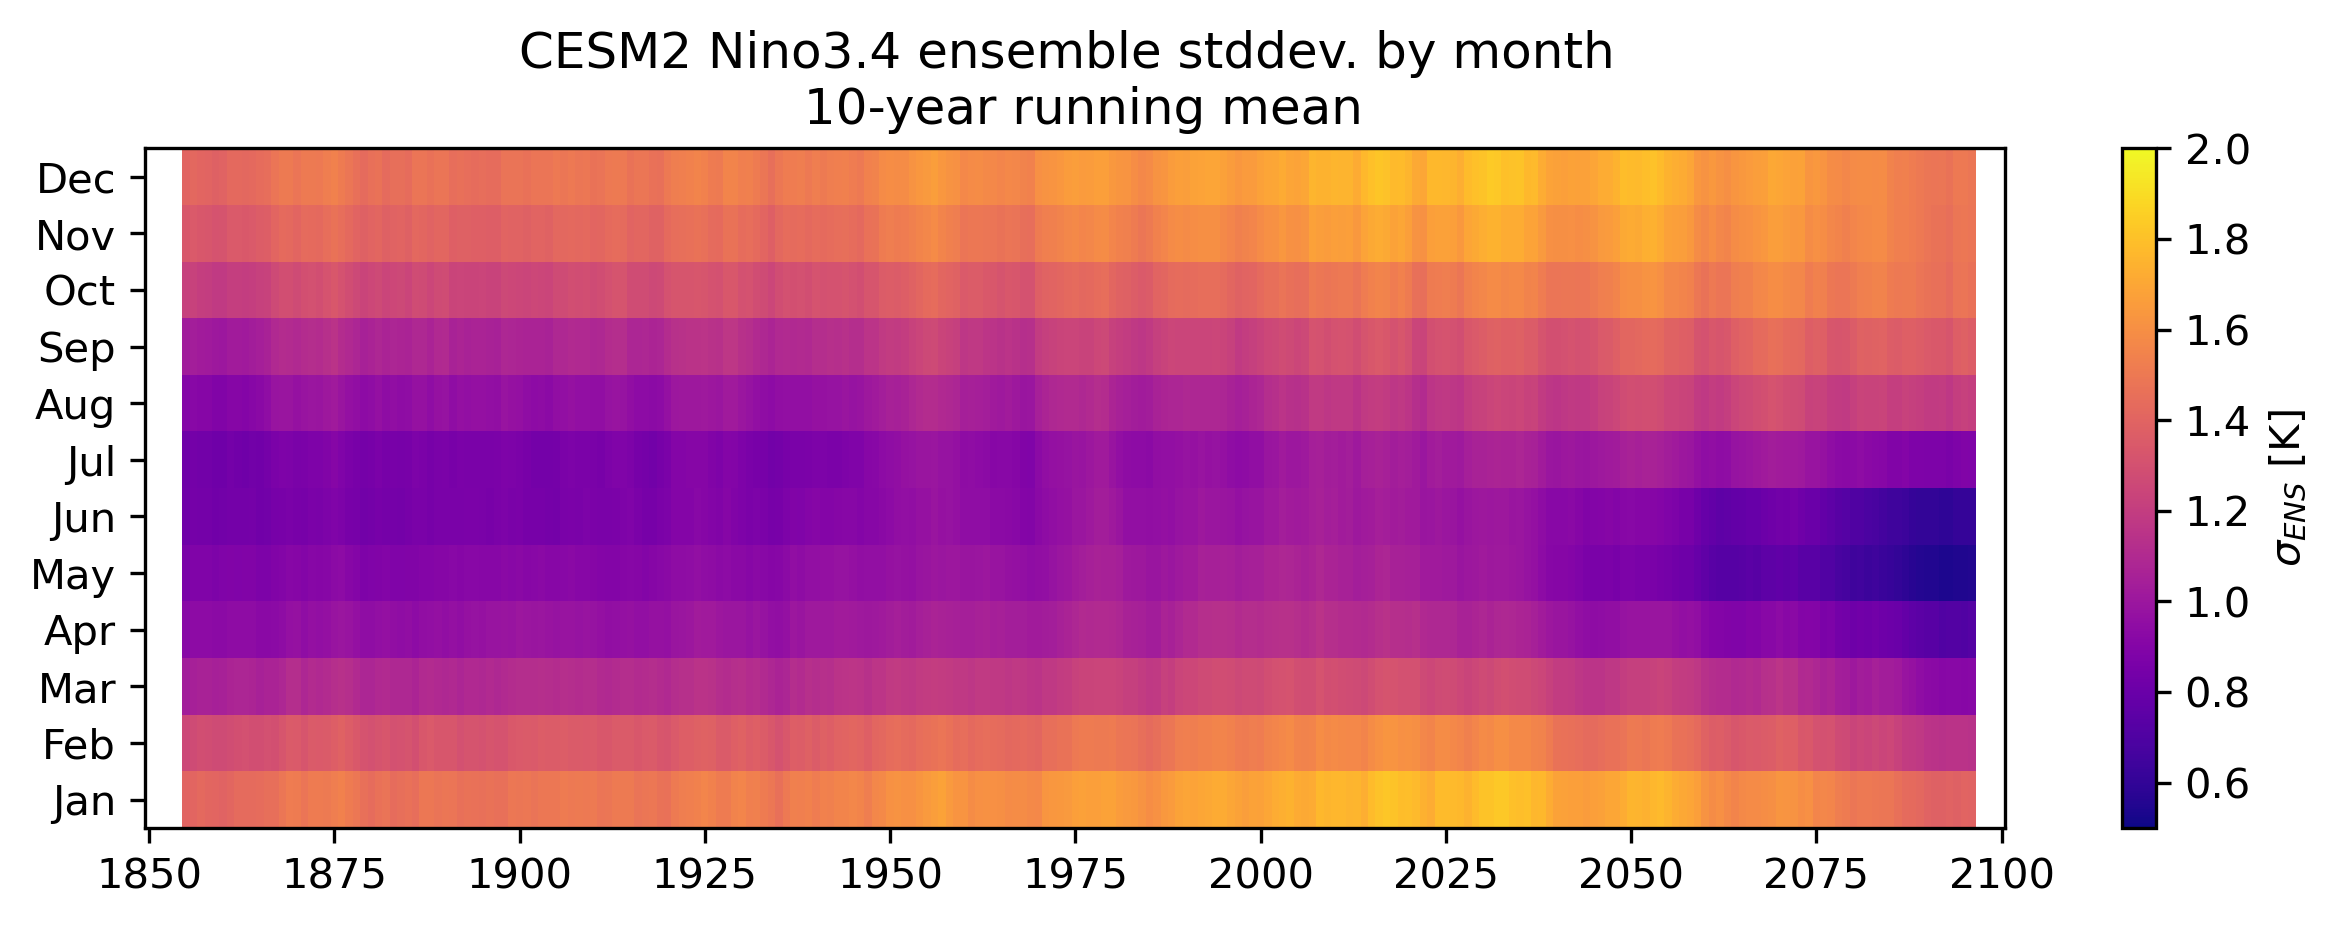

In [32]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(cesm2_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('CESM2 Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_CESM2.png', bbox_inches='tight', dpi=300)

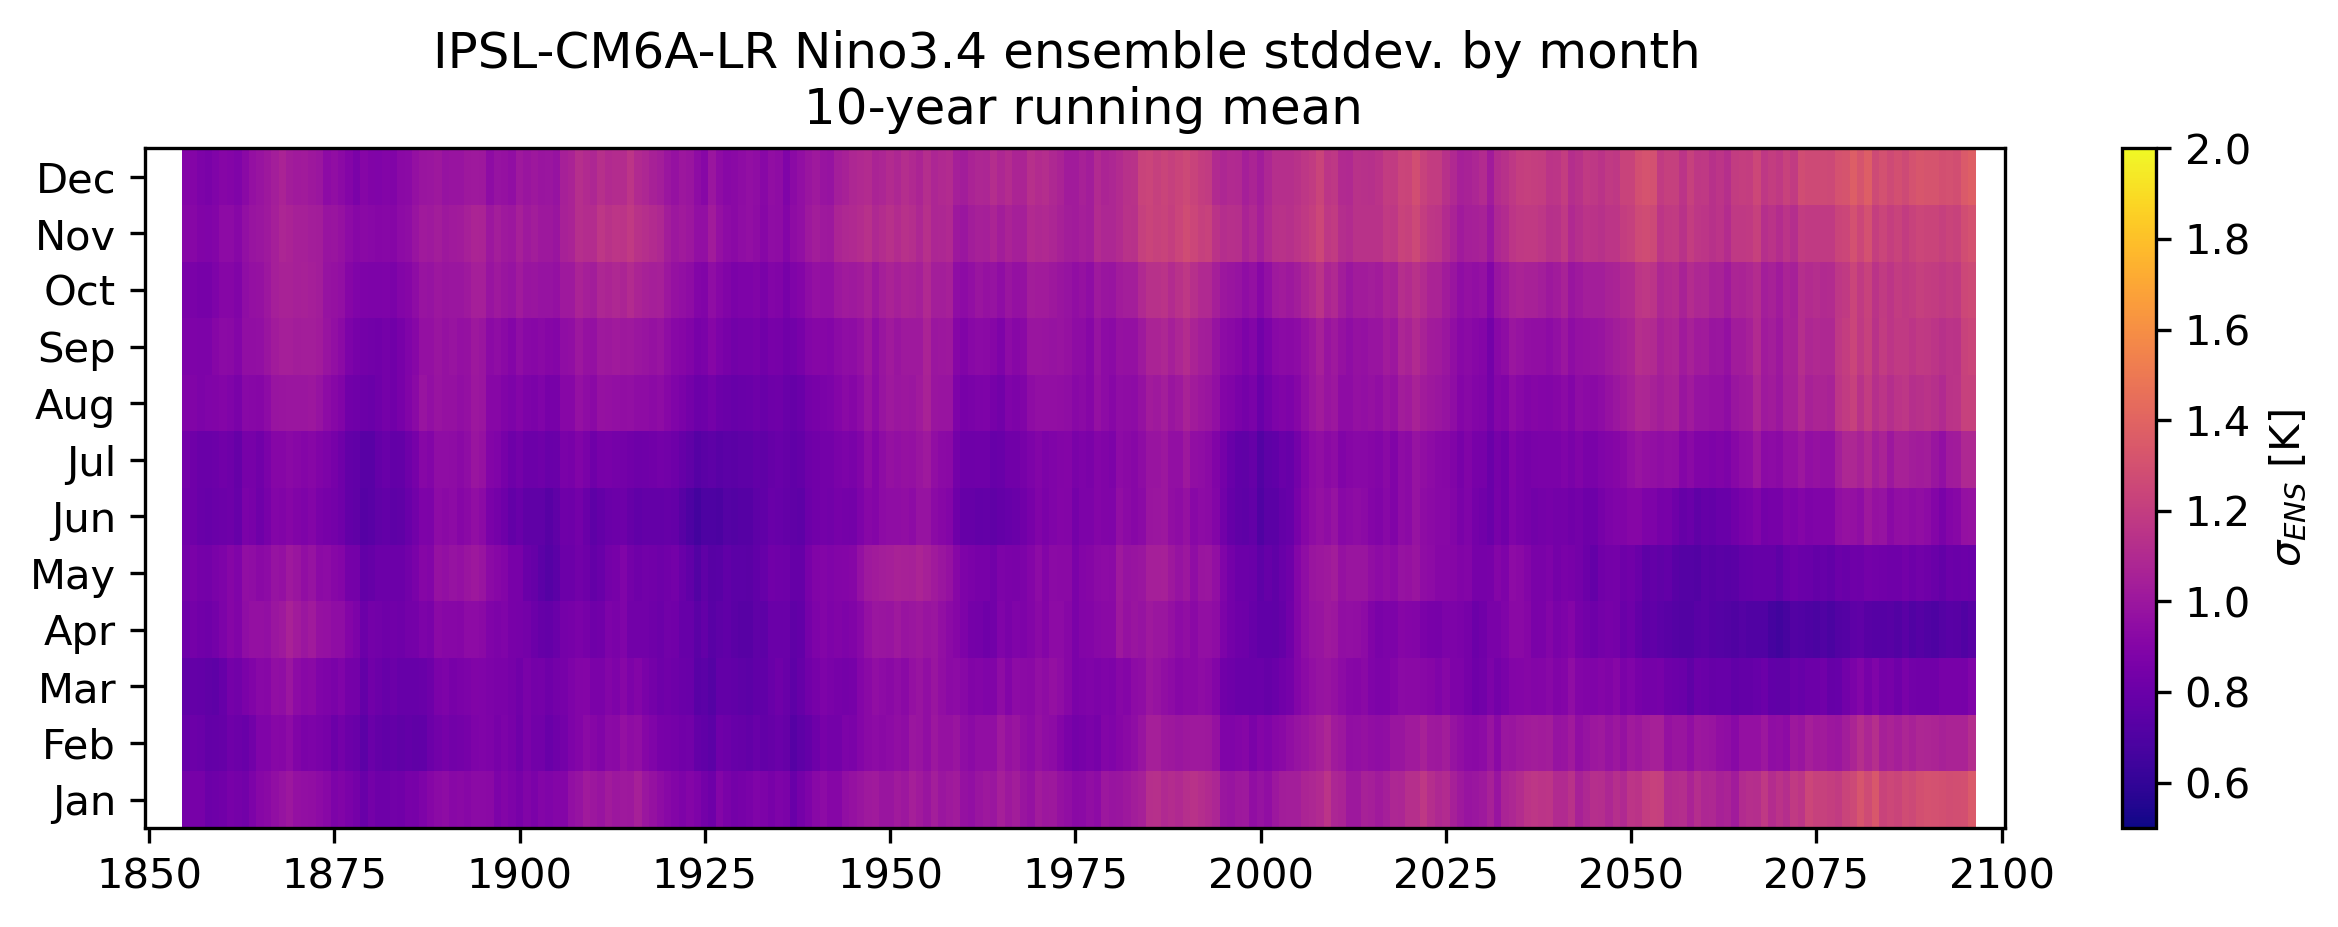

In [33]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(ipsl_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('IPSL-CM6A-LR Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_IPSL-CM6A-LR.png', bbox_inches='tight', dpi=300)

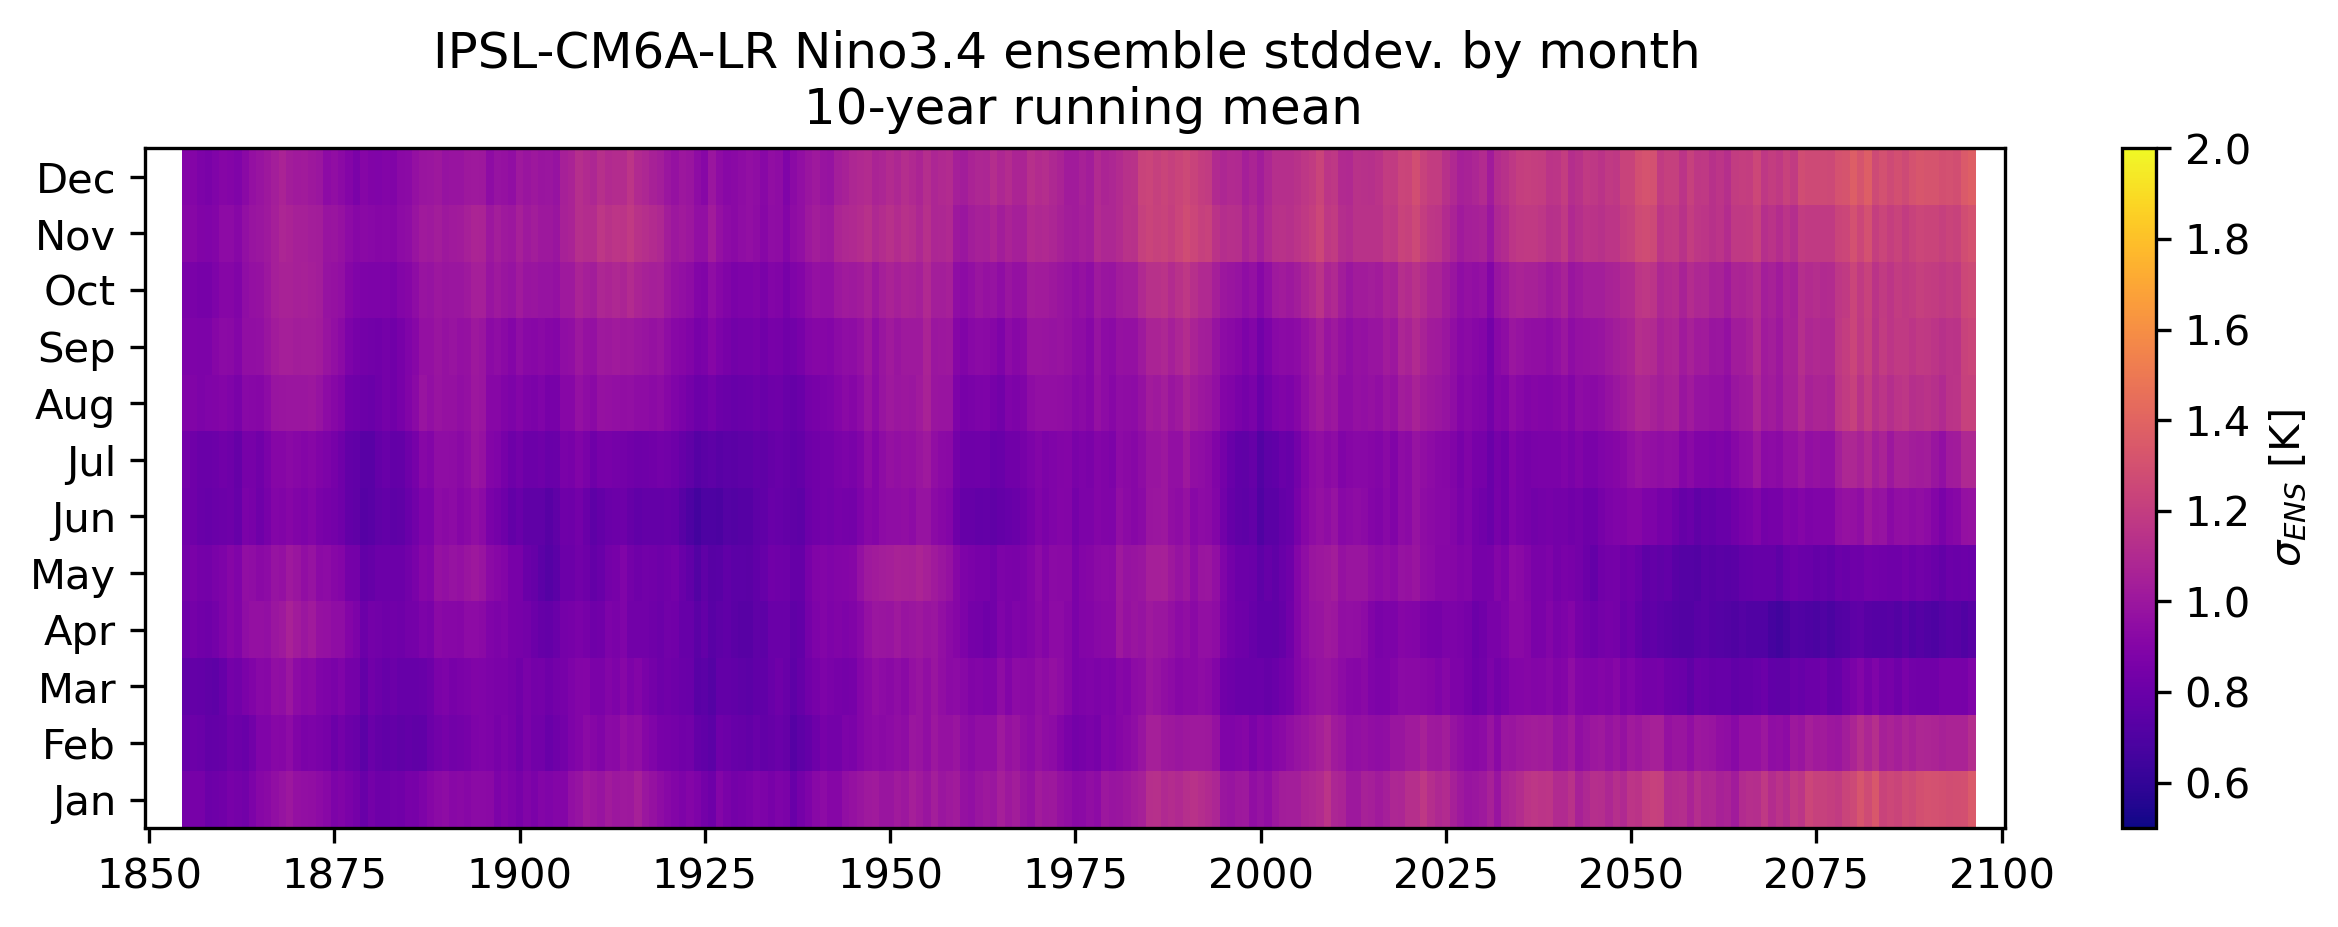

In [34]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(ipsl_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('IPSL-CM6A-LR Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_IPSL-CM6A-LR.png', bbox_inches='tight', dpi=300)

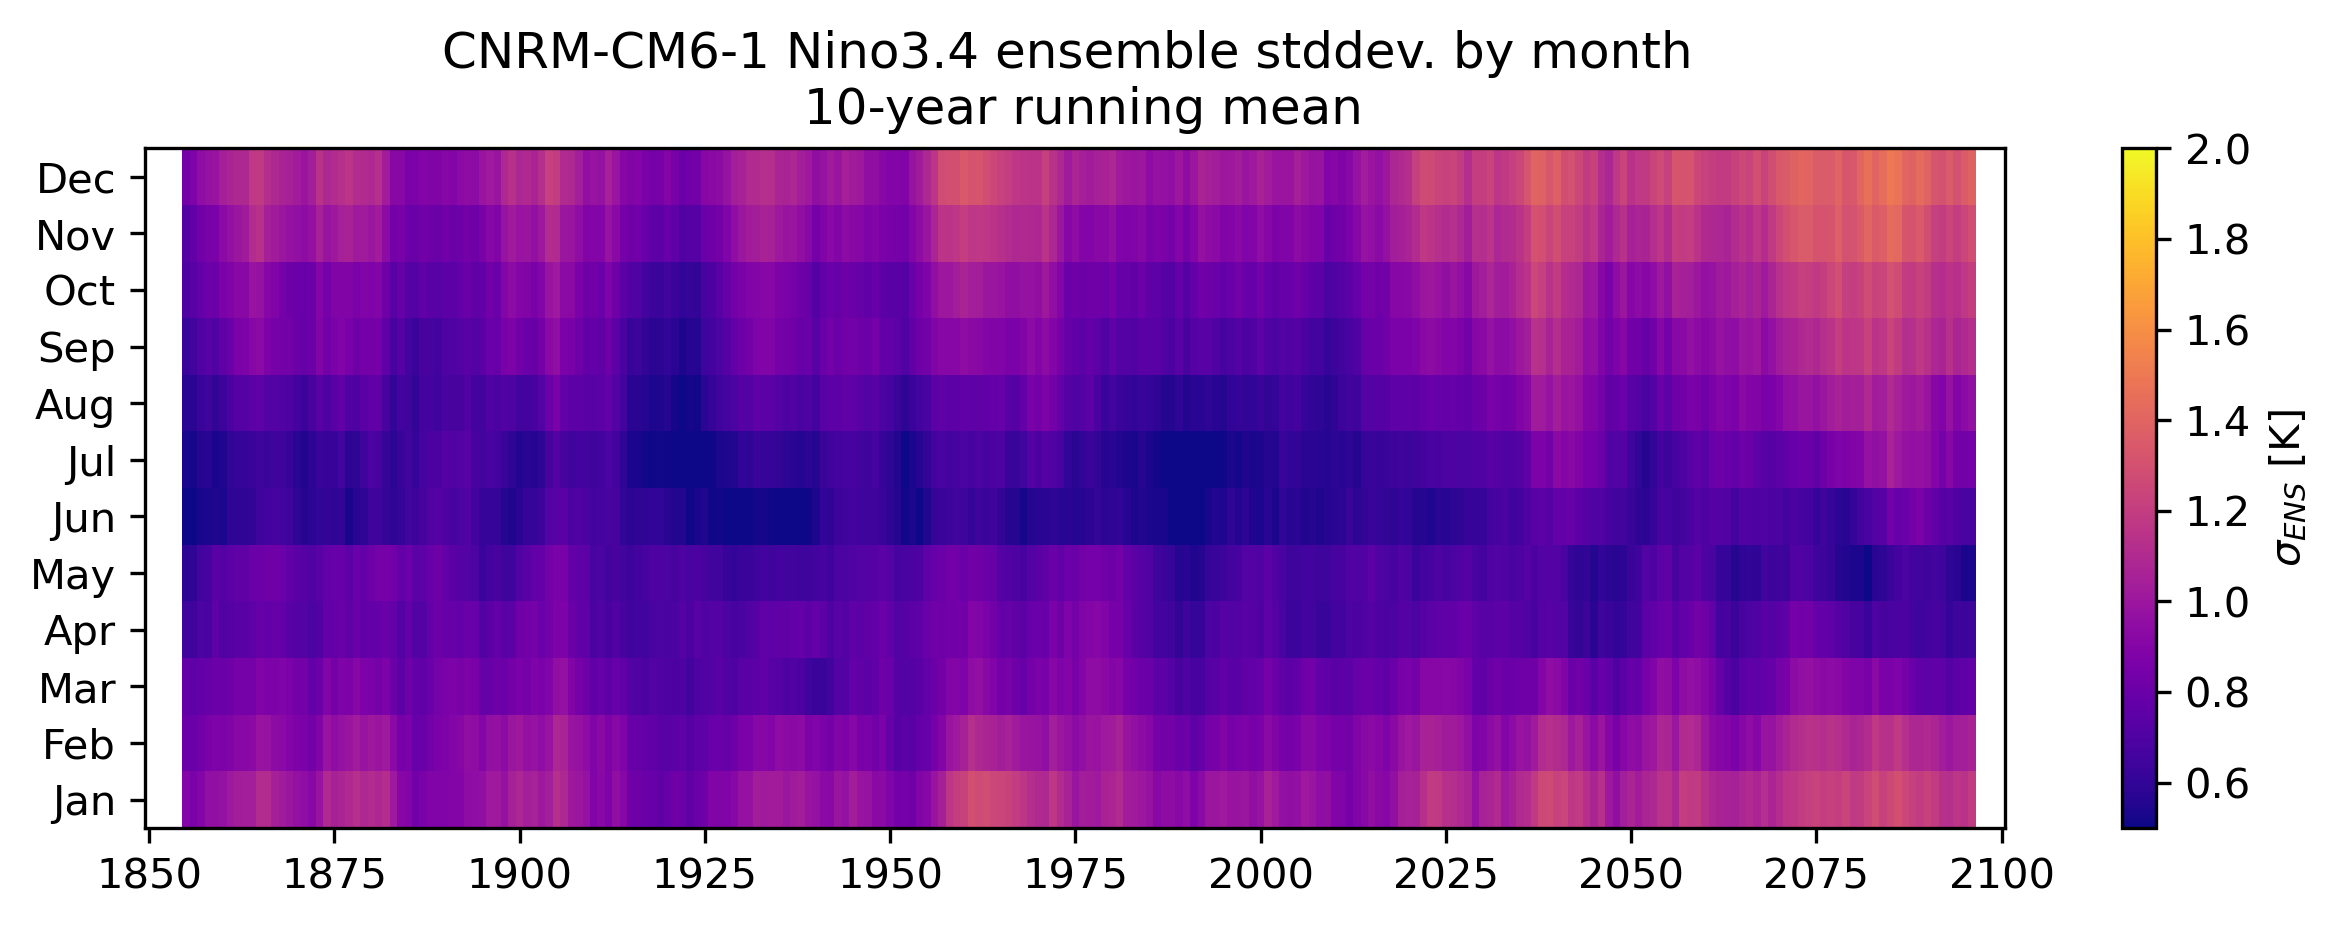

In [35]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(cnrm_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('CNRM-CM6-1 Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_CNRM-CM6-1.png', bbox_inches='tight', dpi=300)

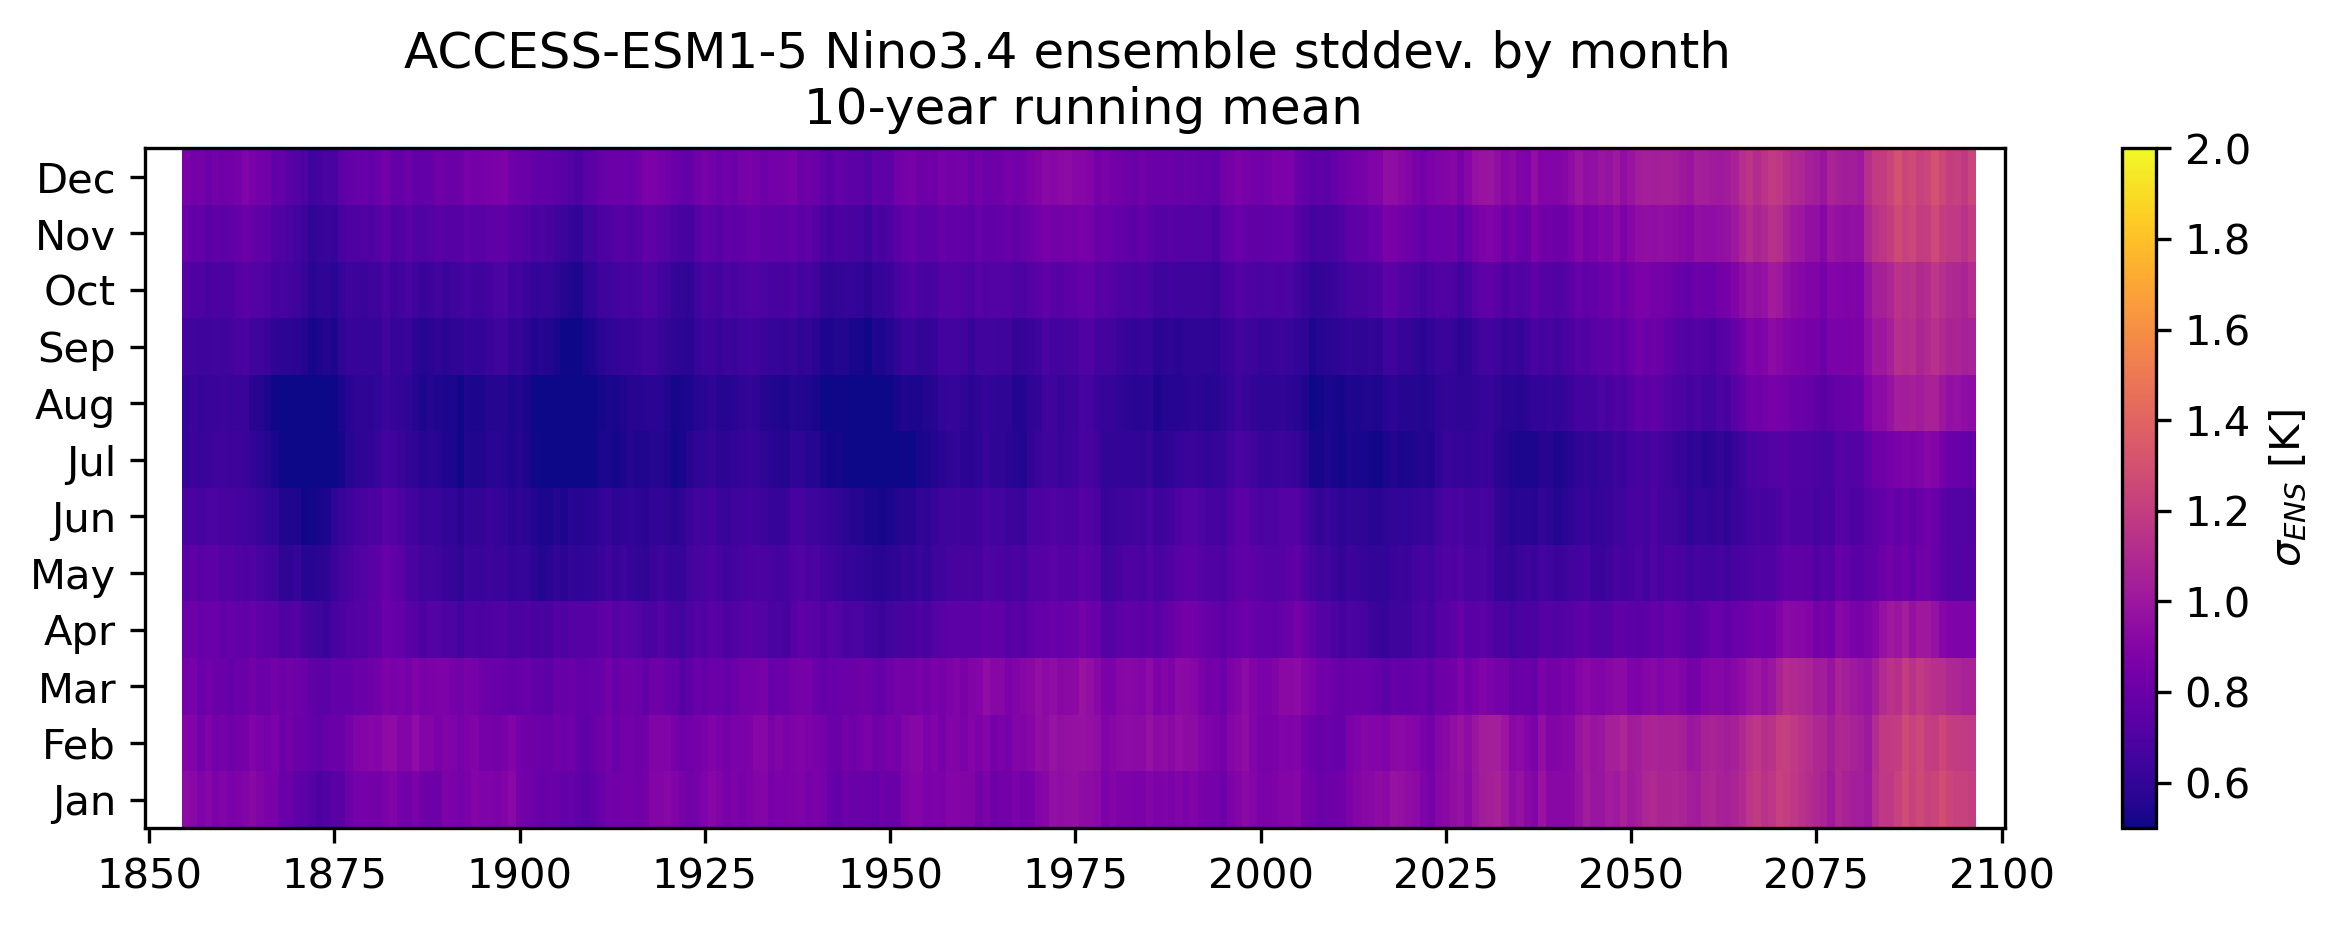

In [63]:
fig, axes = plt.subplots(1,1, figsize=(10,3))



im = axes.pcolormesh(access_nino34_std_bymonth_array,cmap='plasma',vmin=0.5,vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'$\sigma_{ENS}$ [K]', rotation=90)


axes.set_yticks(np.arange(0.5,12.5,1));
axes.set_yticklabels(Months);
axes.set_xticks(np.arange(0.5,251.5,25));
axes.set_xticklabels(years[0::25]);


plt.title('ACCESS-ESM1-5 Nino3.4 ensemble stddev. by month \n '+str(runmean_length)+'-year running mean')
plt.savefig(plotdir+'nino34_monthly_ensstddev_ACCESS-ESM1-5.png', bbox_inches='tight', dpi=300)

## Histograms for different time periods

In [64]:
runmean_length = 1 # turn off running means because we average over 30-year periods

# group by month and average over ensemble
canesm5_nino34_mean_bymonth = canesm5_nino34.mean(dim='ensemble').groupby('time.month')
miroc6_nino34_mean_bymonth = miroc6_nino34.mean(dim='ensemble').groupby('time.month')
cesm2_nino34_mean_bymonth = cesm2_nino34.mean(dim='ensemble').groupby('time.month')
ipsl_nino34_mean_bymonth = ipsl_nino34.mean(dim='ensemble').groupby('time.month')
cnrm_nino34_mean_bymonth = cnrm_nino34.mean(dim='ensemble').groupby('time.month')
access_nino34_mean_bymonth = access_nino34.mean(dim='ensemble').groupby('time.month')



In [37]:
# observations

# standard deviation by month
hadisst_mean = []
hadisst_std = []
for m in range(1,13):
    hadisst_mean.append(hadisst.groupby('TIME.month')[m].mean())
    hadisst_std.append(hadisst.groupby('TIME.month')[m].std())
    
hadisst_mean = hadisst_mean - np.mean(hadisst_mean)

In [65]:
# average for first and last 30 years
canesm5_nino34_mean_bymonth_array = np.array([canesm5_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          canesm5_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

miroc6_nino34_mean_bymonth_array = np.array([miroc6_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          miroc6_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

cesm2_nino34_mean_bymonth_array = np.array([cesm2_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          cesm2_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

ipsl_nino34_mean_bymonth_array = np.array([ipsl_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          ipsl_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

cnrm_nino34_mean_bymonth_array = np.array([cnrm_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          cnrm_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

access_nino34_mean_bymonth_array = np.array([access_nino34_mean_bymonth[1].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[2].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[3].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[4].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[5].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[6].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[7].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[8].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[9].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[10].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[11].rolling(time=runmean_length, center=True).mean(),
          access_nino34_mean_bymonth[12].rolling(time=runmean_length, center=True).mean()
          ])

In [39]:
# period_start= cesm2_nino34_std_bymonth_array[:,5:35].mean(axis=1)
# period_end = cesm2_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)


# fig, axes = plt.subplots(1,1, figsize=(8,4))


# plt.bar(np.arange(1,13,1), period_end, width=0.8,color='red',alpha=0.5)
# plt.bar(np.arange(1,13,1), period_start, width=0.8,color='blue',alpha=0.5)

# axes.set_xticks(np.arange(1,13,1));
# axes.set_xticklabels(Months);


In [40]:
ylimll = 0.5
ylimlh = 1.8
ylimrl = -1.3
ylimrh = 1.6

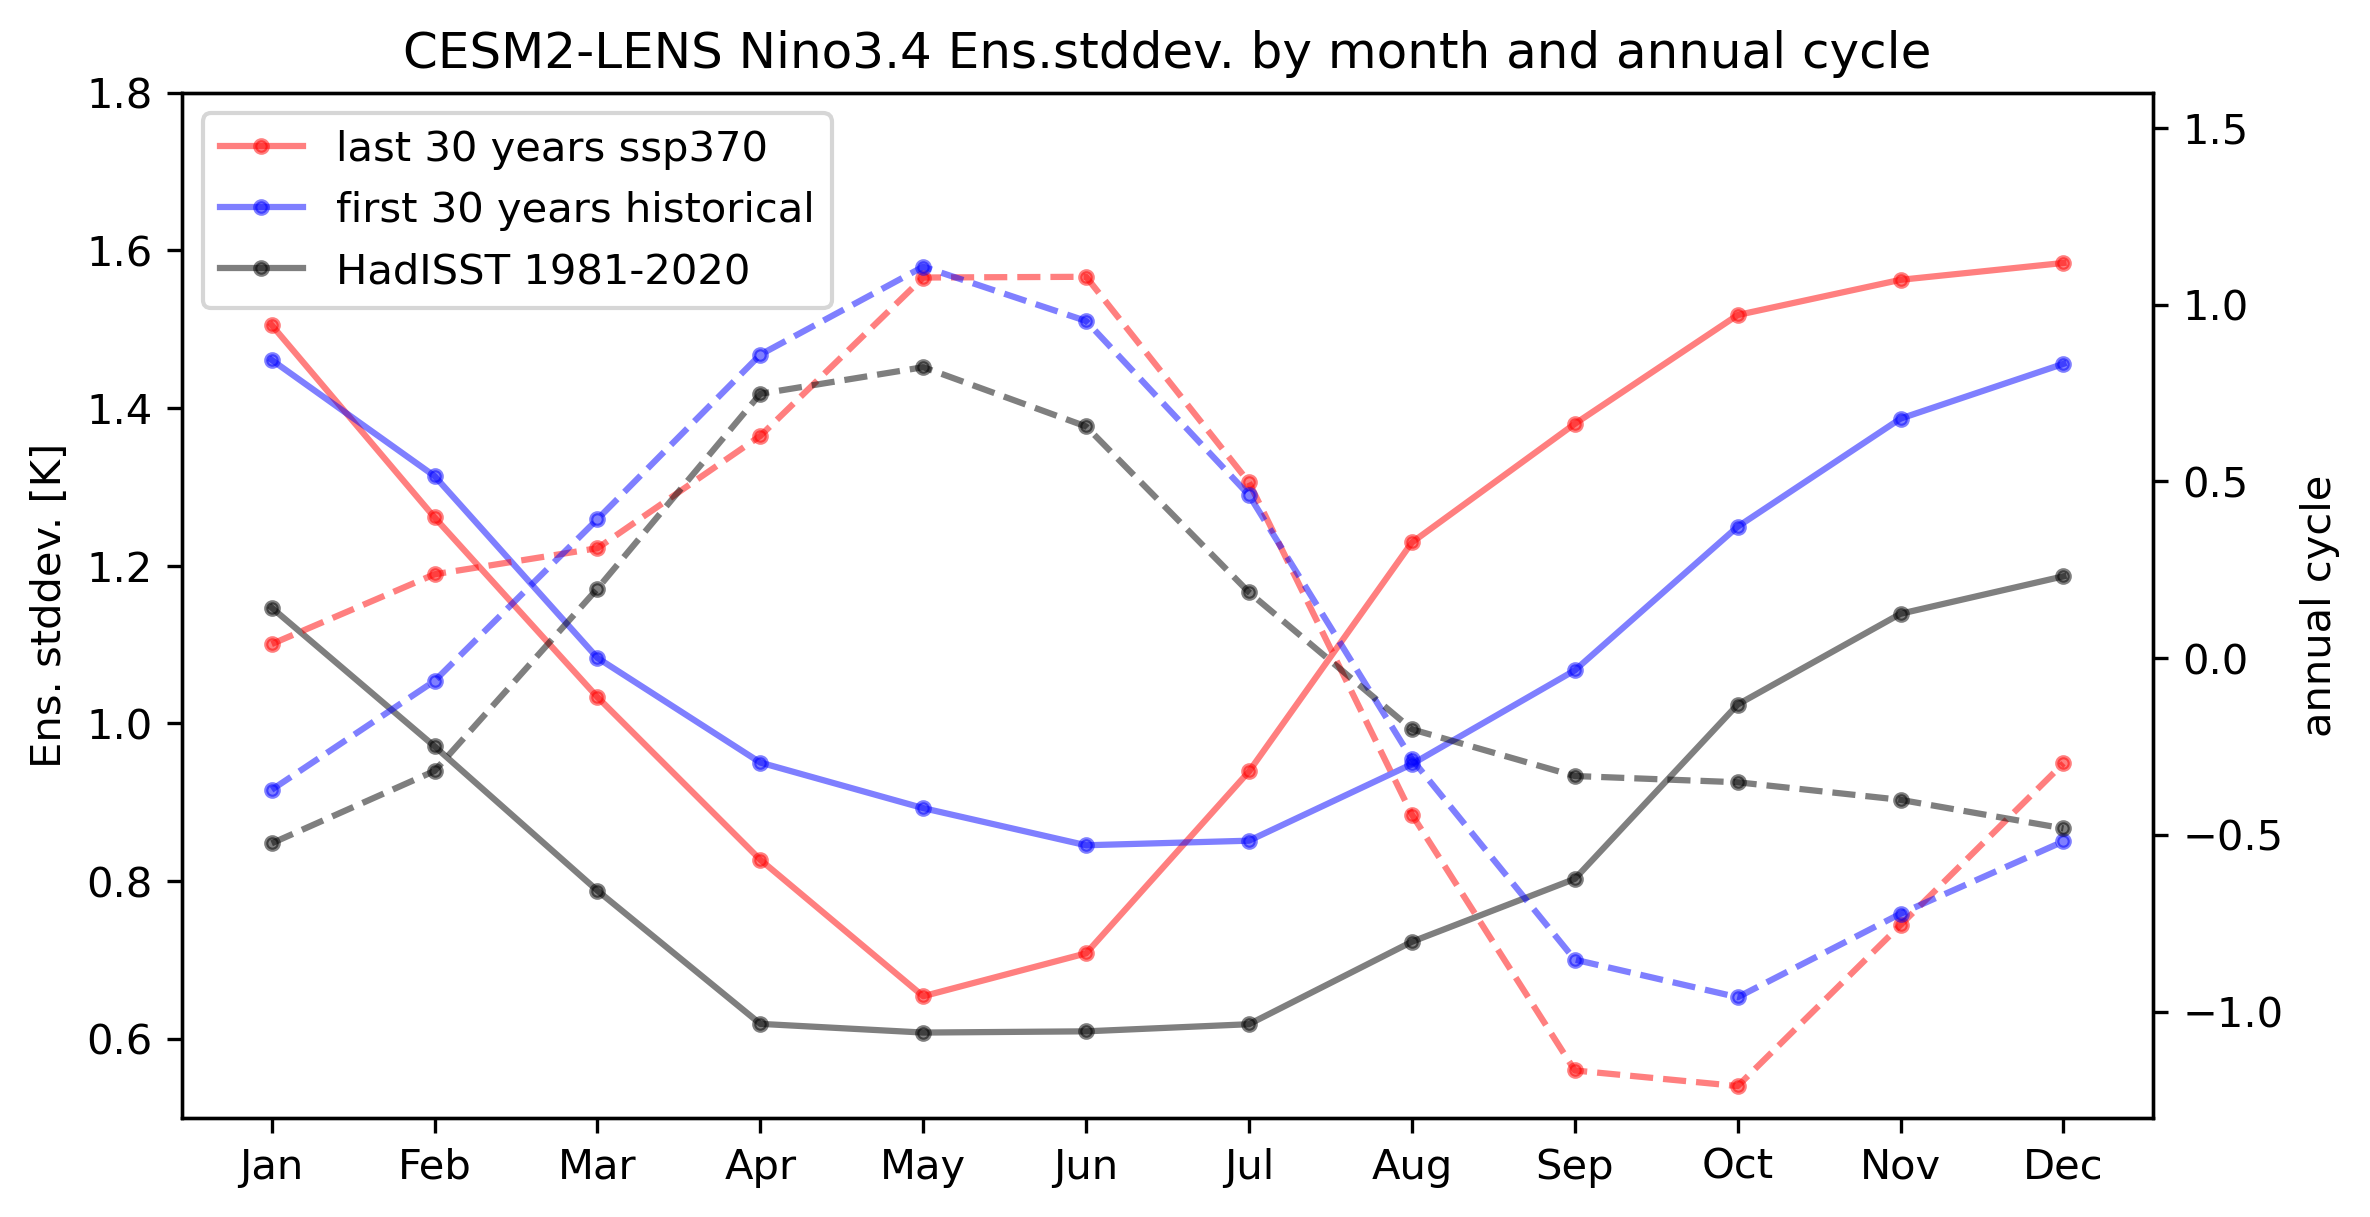

In [41]:
period_start= cesm2_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = cesm2_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= cesm2_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-cesm2_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = cesm2_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-cesm2_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('CESM2-LENS Nino3.4 Ens.stddev. by month and annual cycle')
plt.savefig(plotdir+'nino34_IV-mean-change_CESM2.png', bbox_inches='tight', dpi=300)

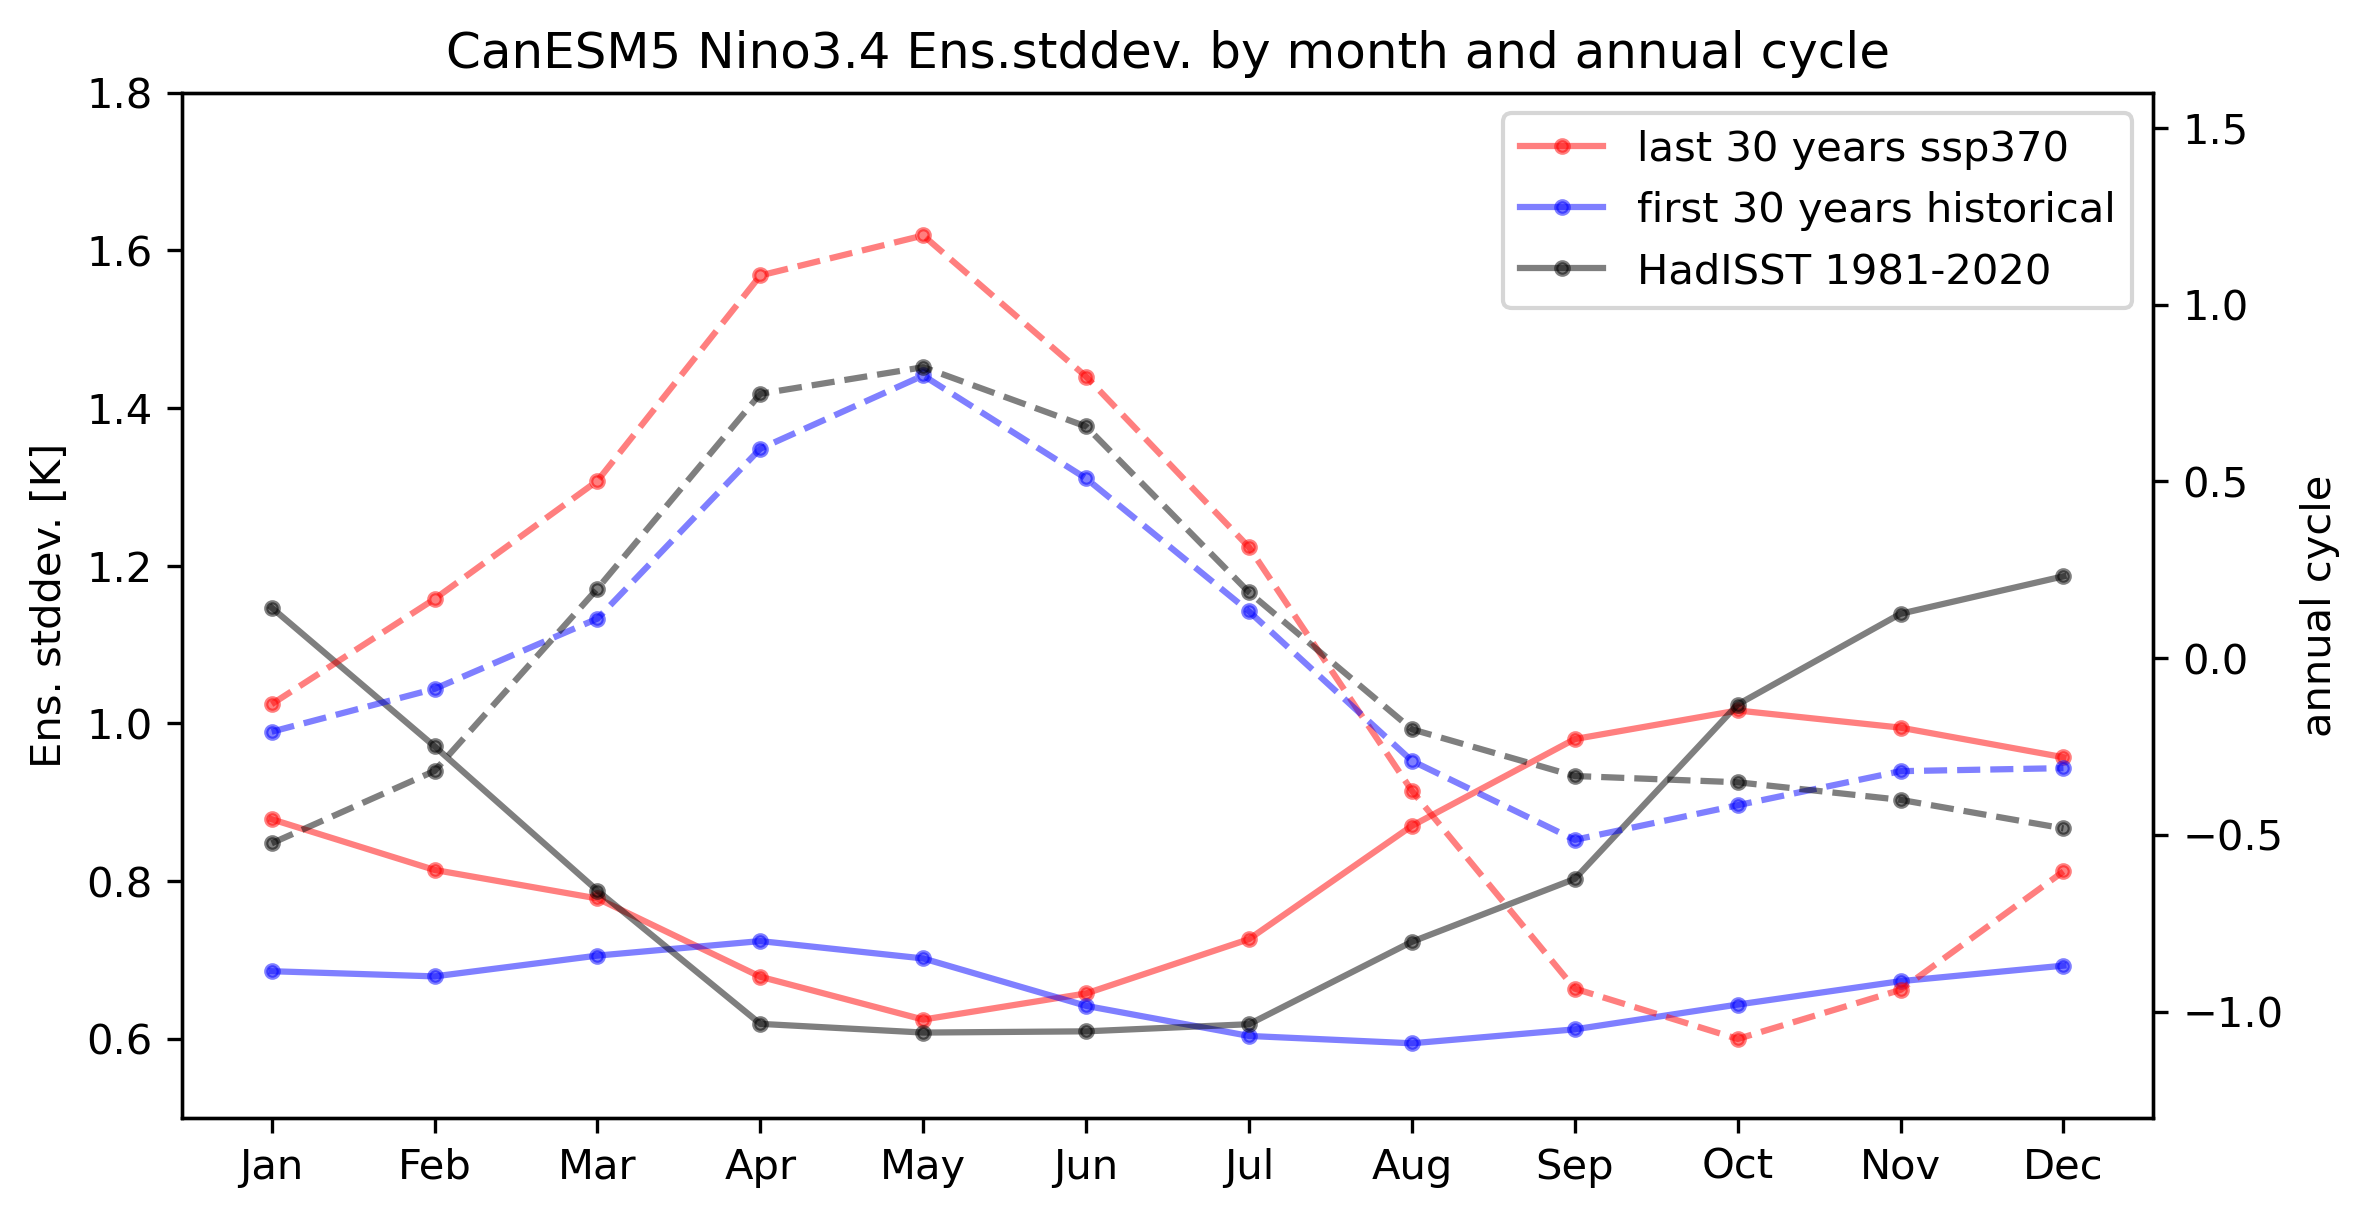

In [42]:
period_start= canesm5_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = canesm5_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= canesm5_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-canesm5_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = canesm5_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-canesm5_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('CanESM5 Nino3.4 Ens.stddev. by month and annual cycle')
plt.savefig(plotdir+'nino34_IV-mean-change_CanESM5.png', bbox_inches='tight', dpi=300)

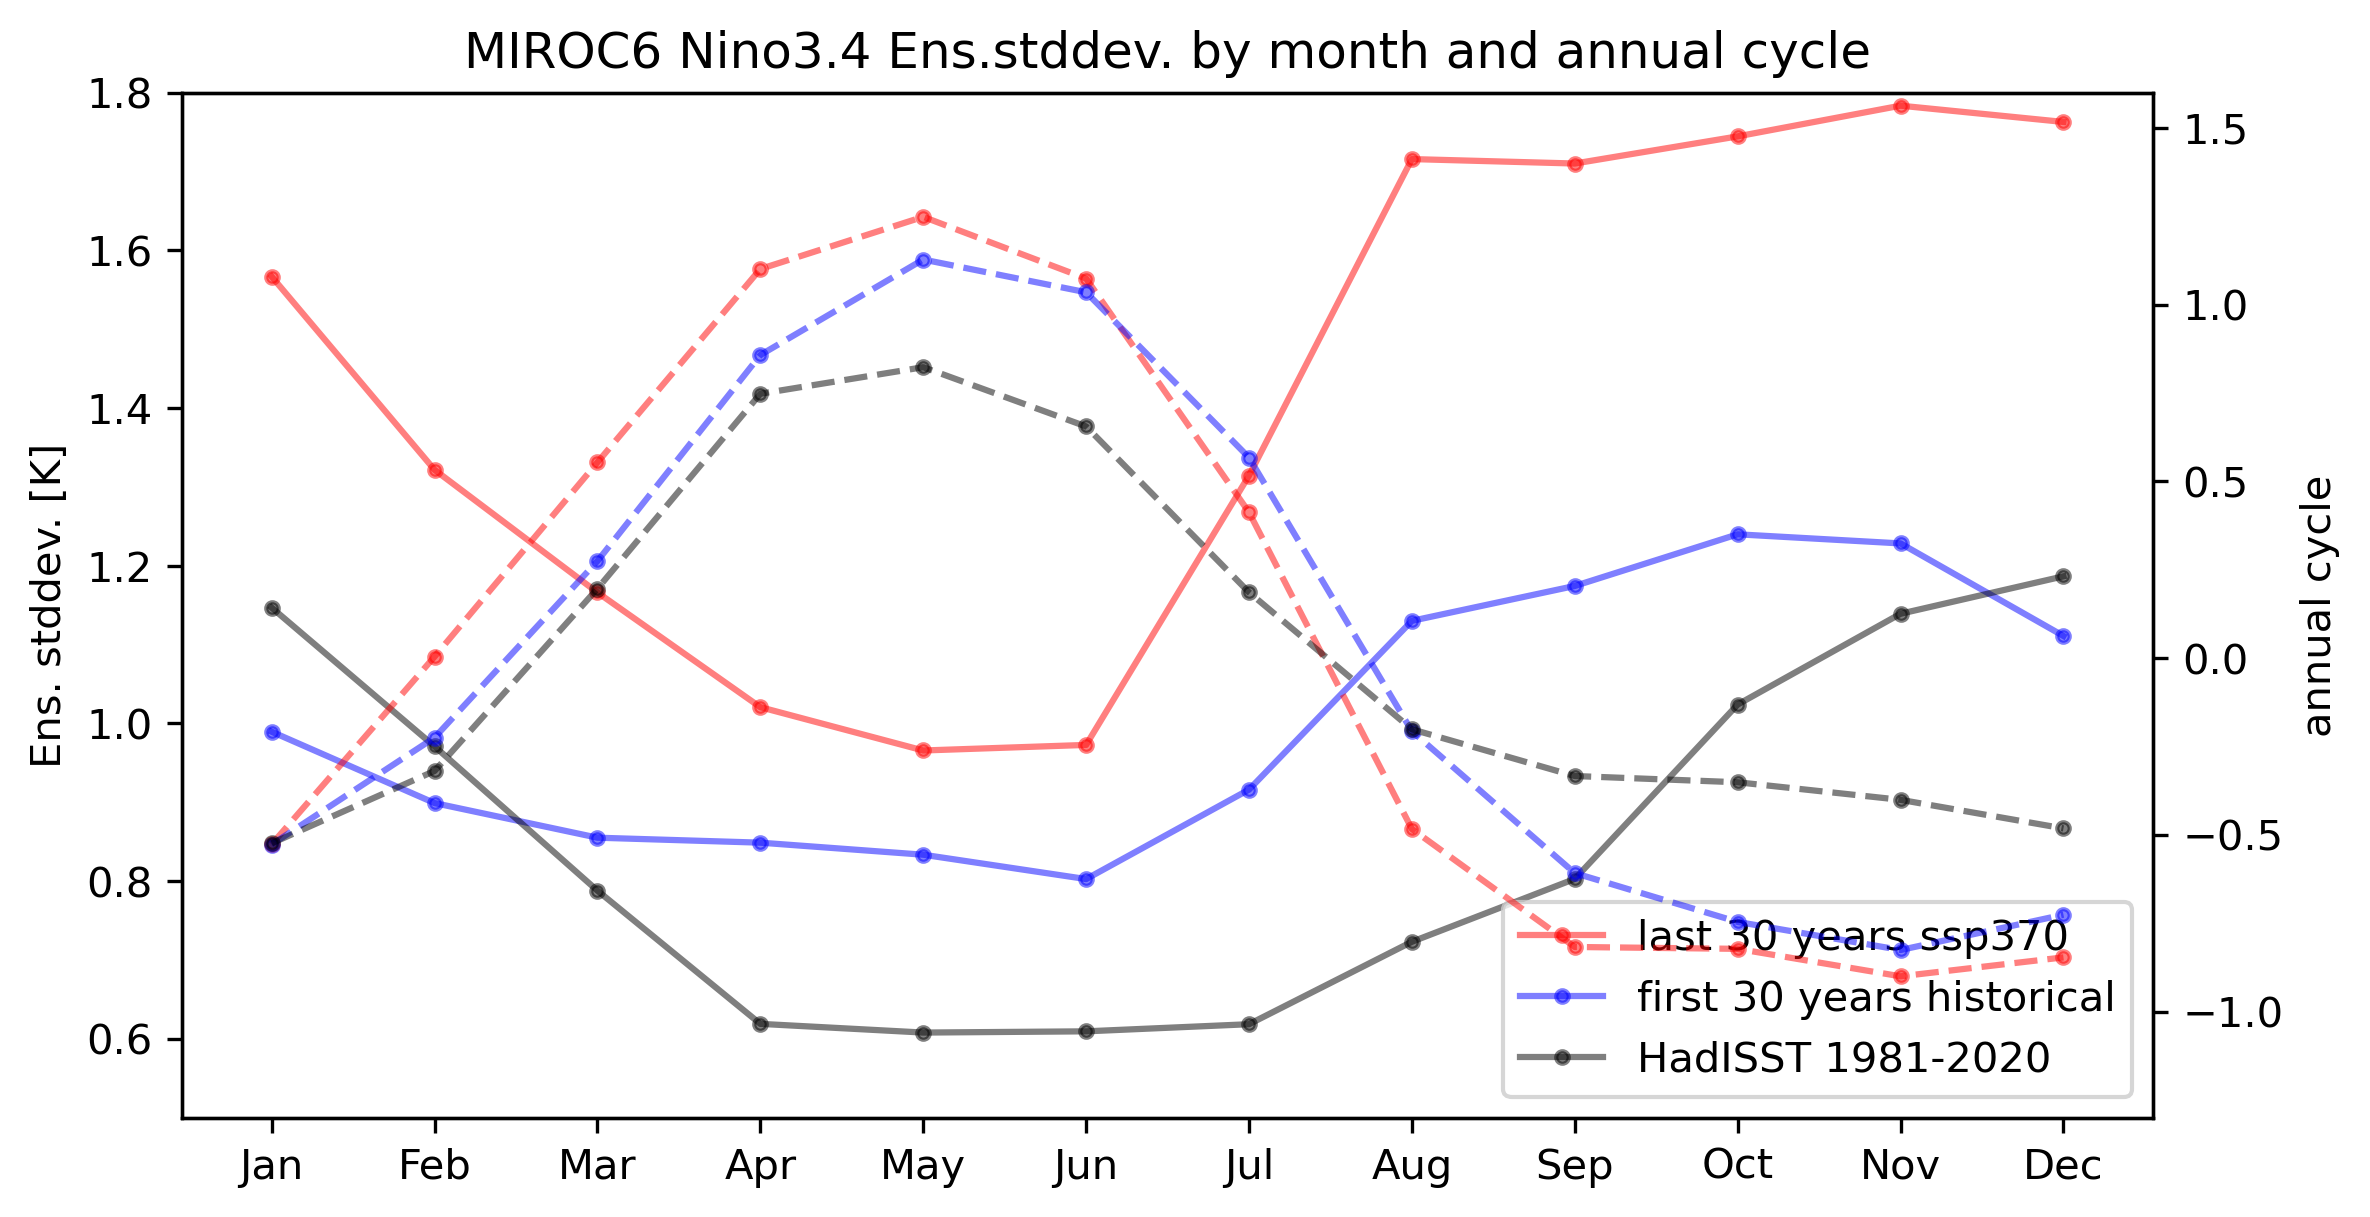

In [43]:
period_start= miroc6_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = miroc6_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= miroc6_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-miroc6_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = miroc6_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-miroc6_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('MIROC6 Nino3.4 Ens.stddev. by month and annual cycle')
plt.savefig(plotdir+'nino34_IV-mean-change_MIROC6.png', bbox_inches='tight', dpi=300)

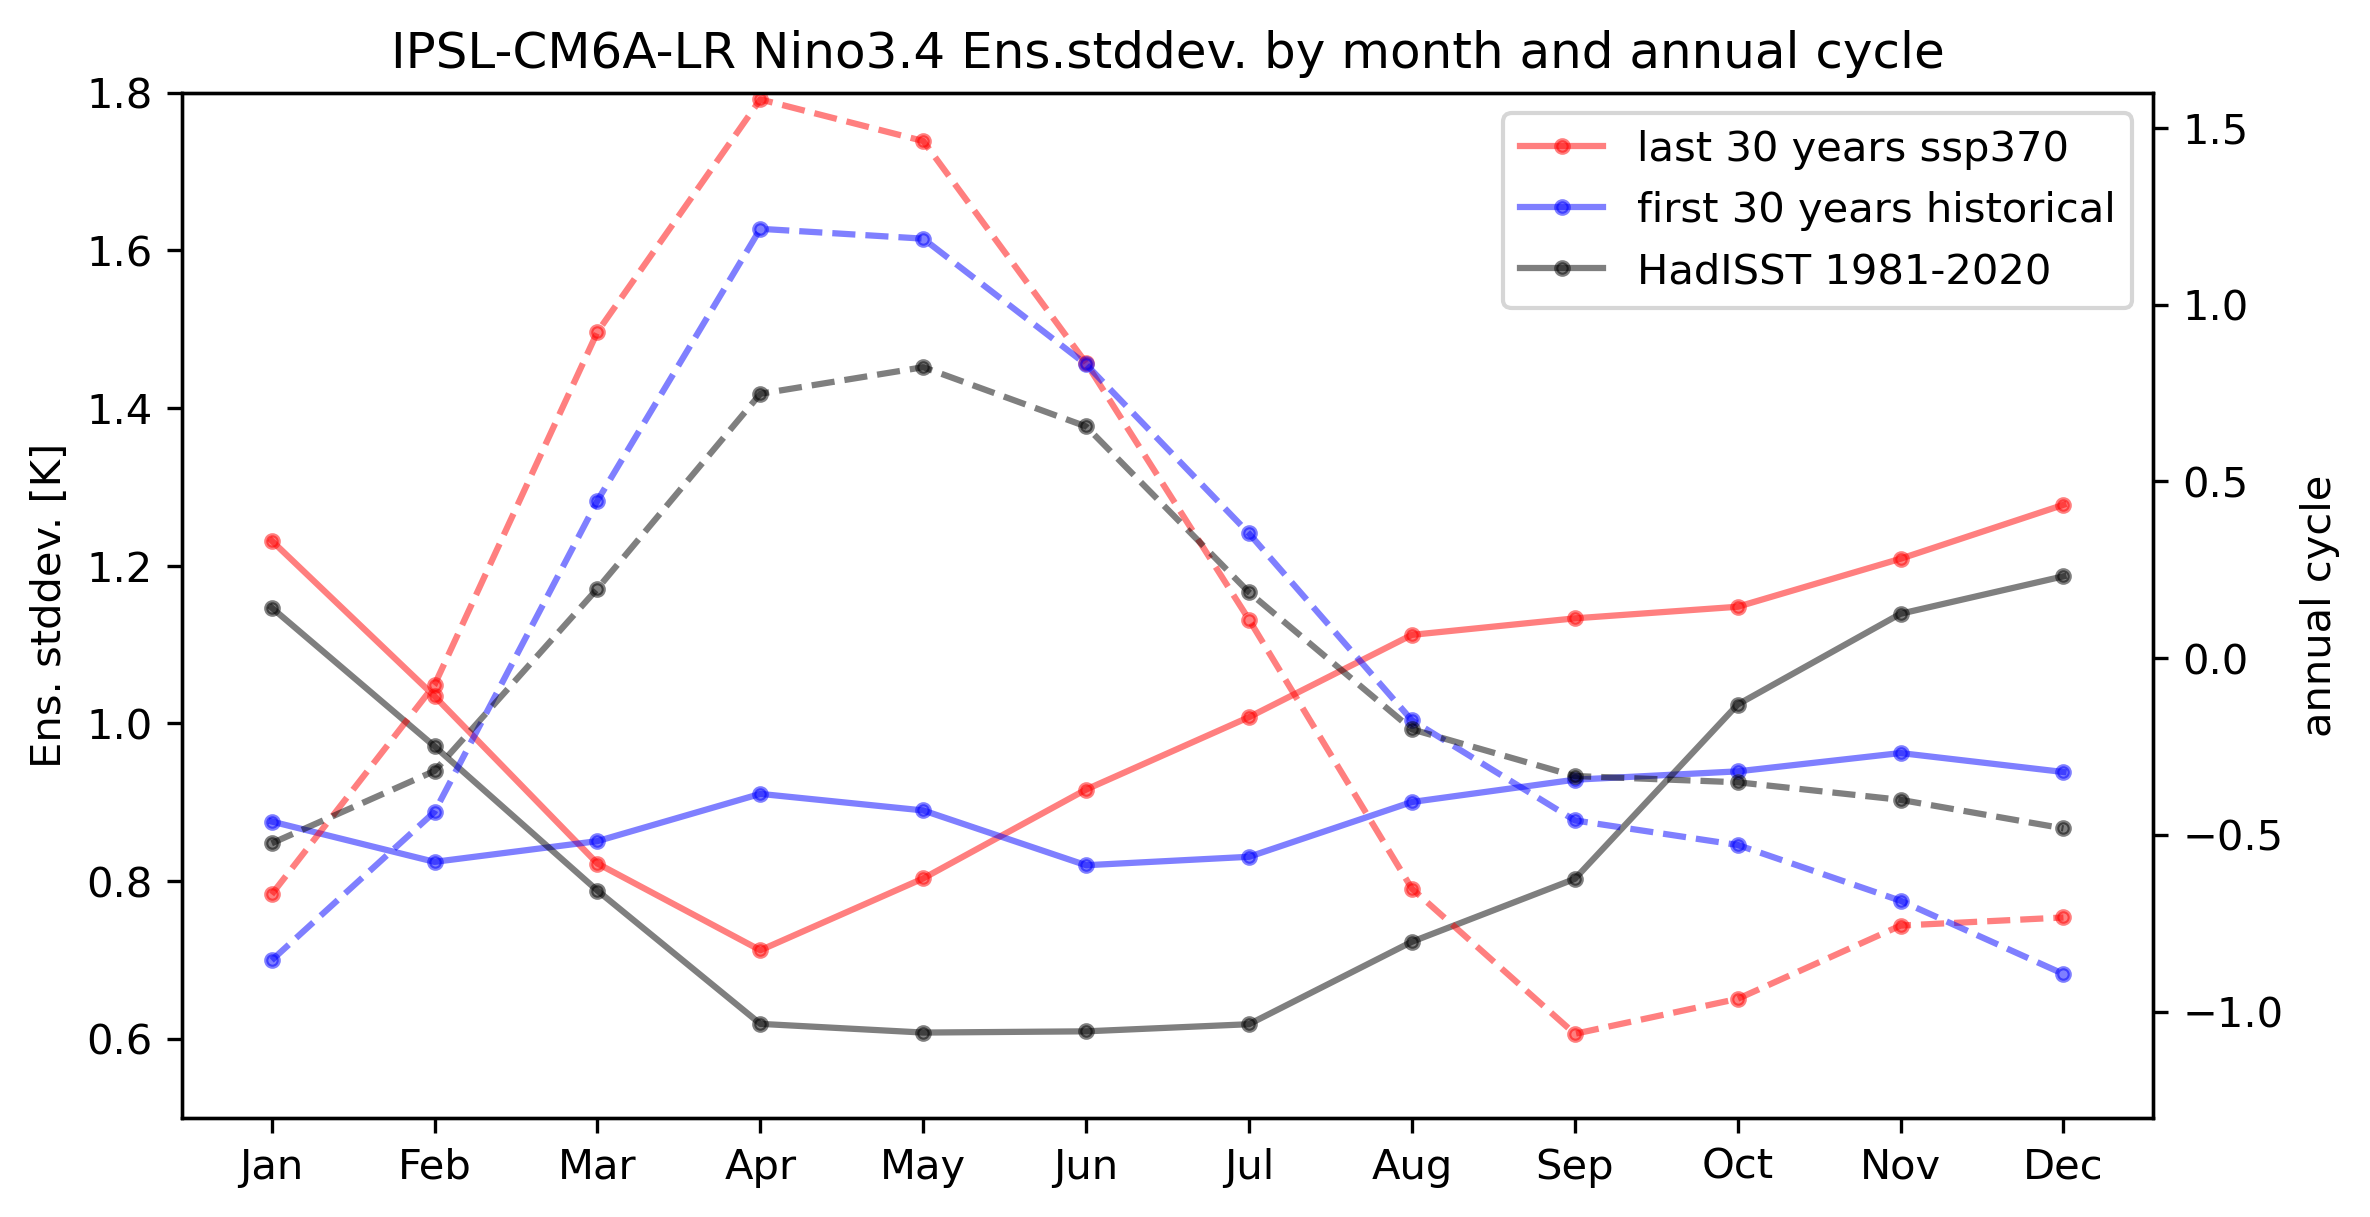

In [44]:

period_start= ipsl_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = ipsl_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= ipsl_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-ipsl_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = ipsl_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-ipsl_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('IPSL-CM6A-LR Nino3.4 Ens.stddev. by month and annual cycle')
plt.savefig(plotdir+'nino34_IV-mean-change_IPSL-CM6A-LR.png', bbox_inches='tight', dpi=300)

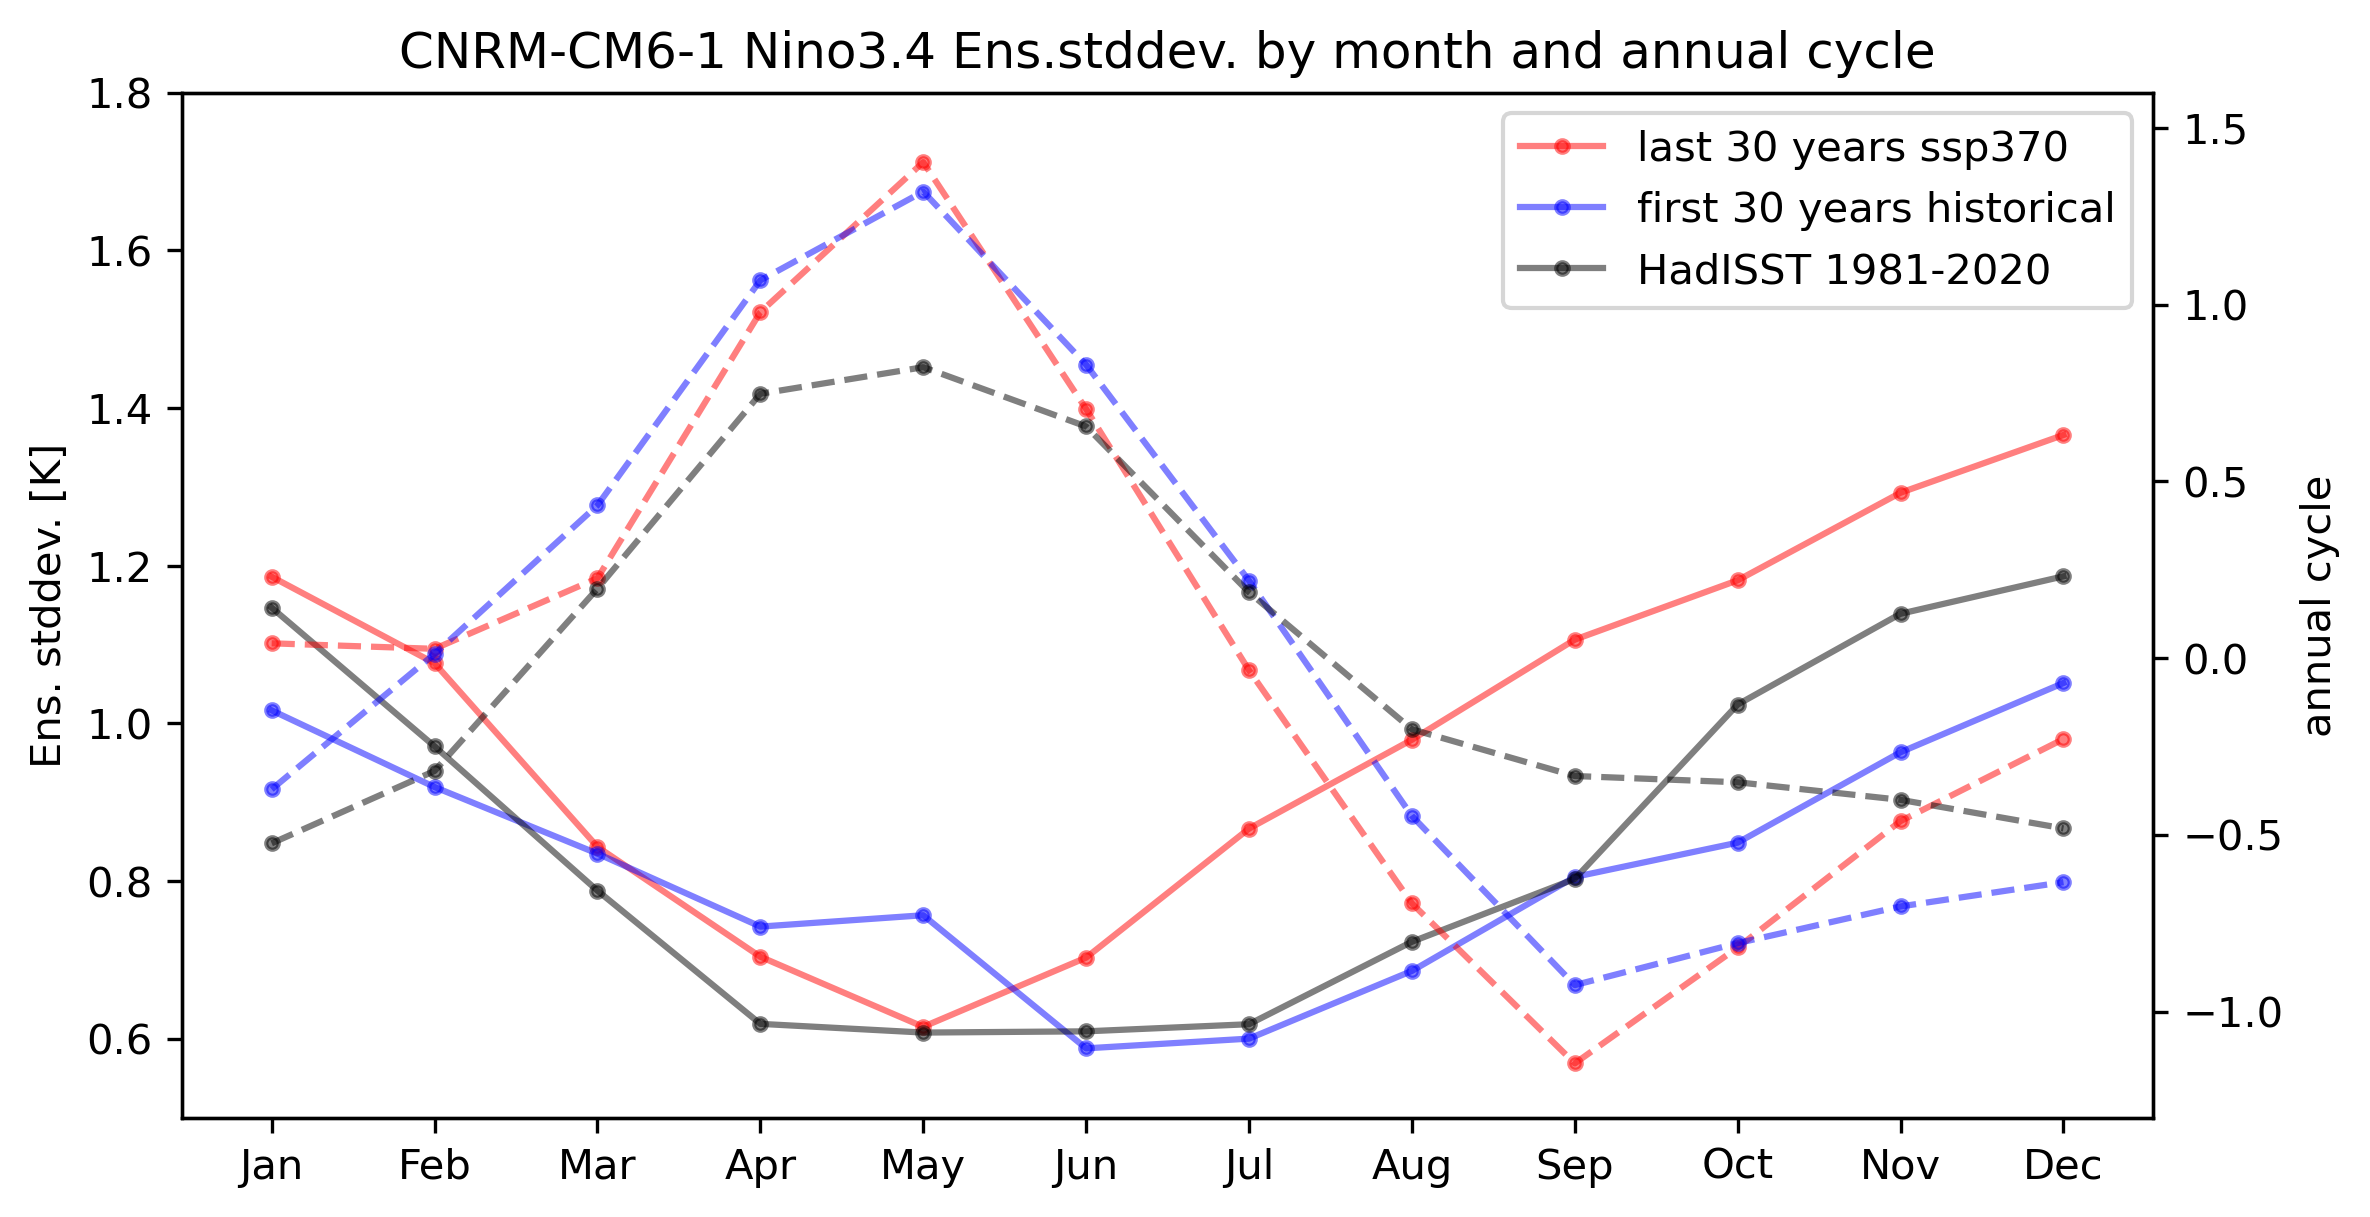

In [45]:

period_start= cnrm_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = cnrm_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= cnrm_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-cnrm_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = cnrm_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-cnrm_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('CNRM-CM6-1 Nino3.4 Ens.stddev. by month and annual cycle')

plt.savefig(plotdir+'nino34_IV-mean-change_CNRM-CM6-1.png', bbox_inches='tight', dpi=300)

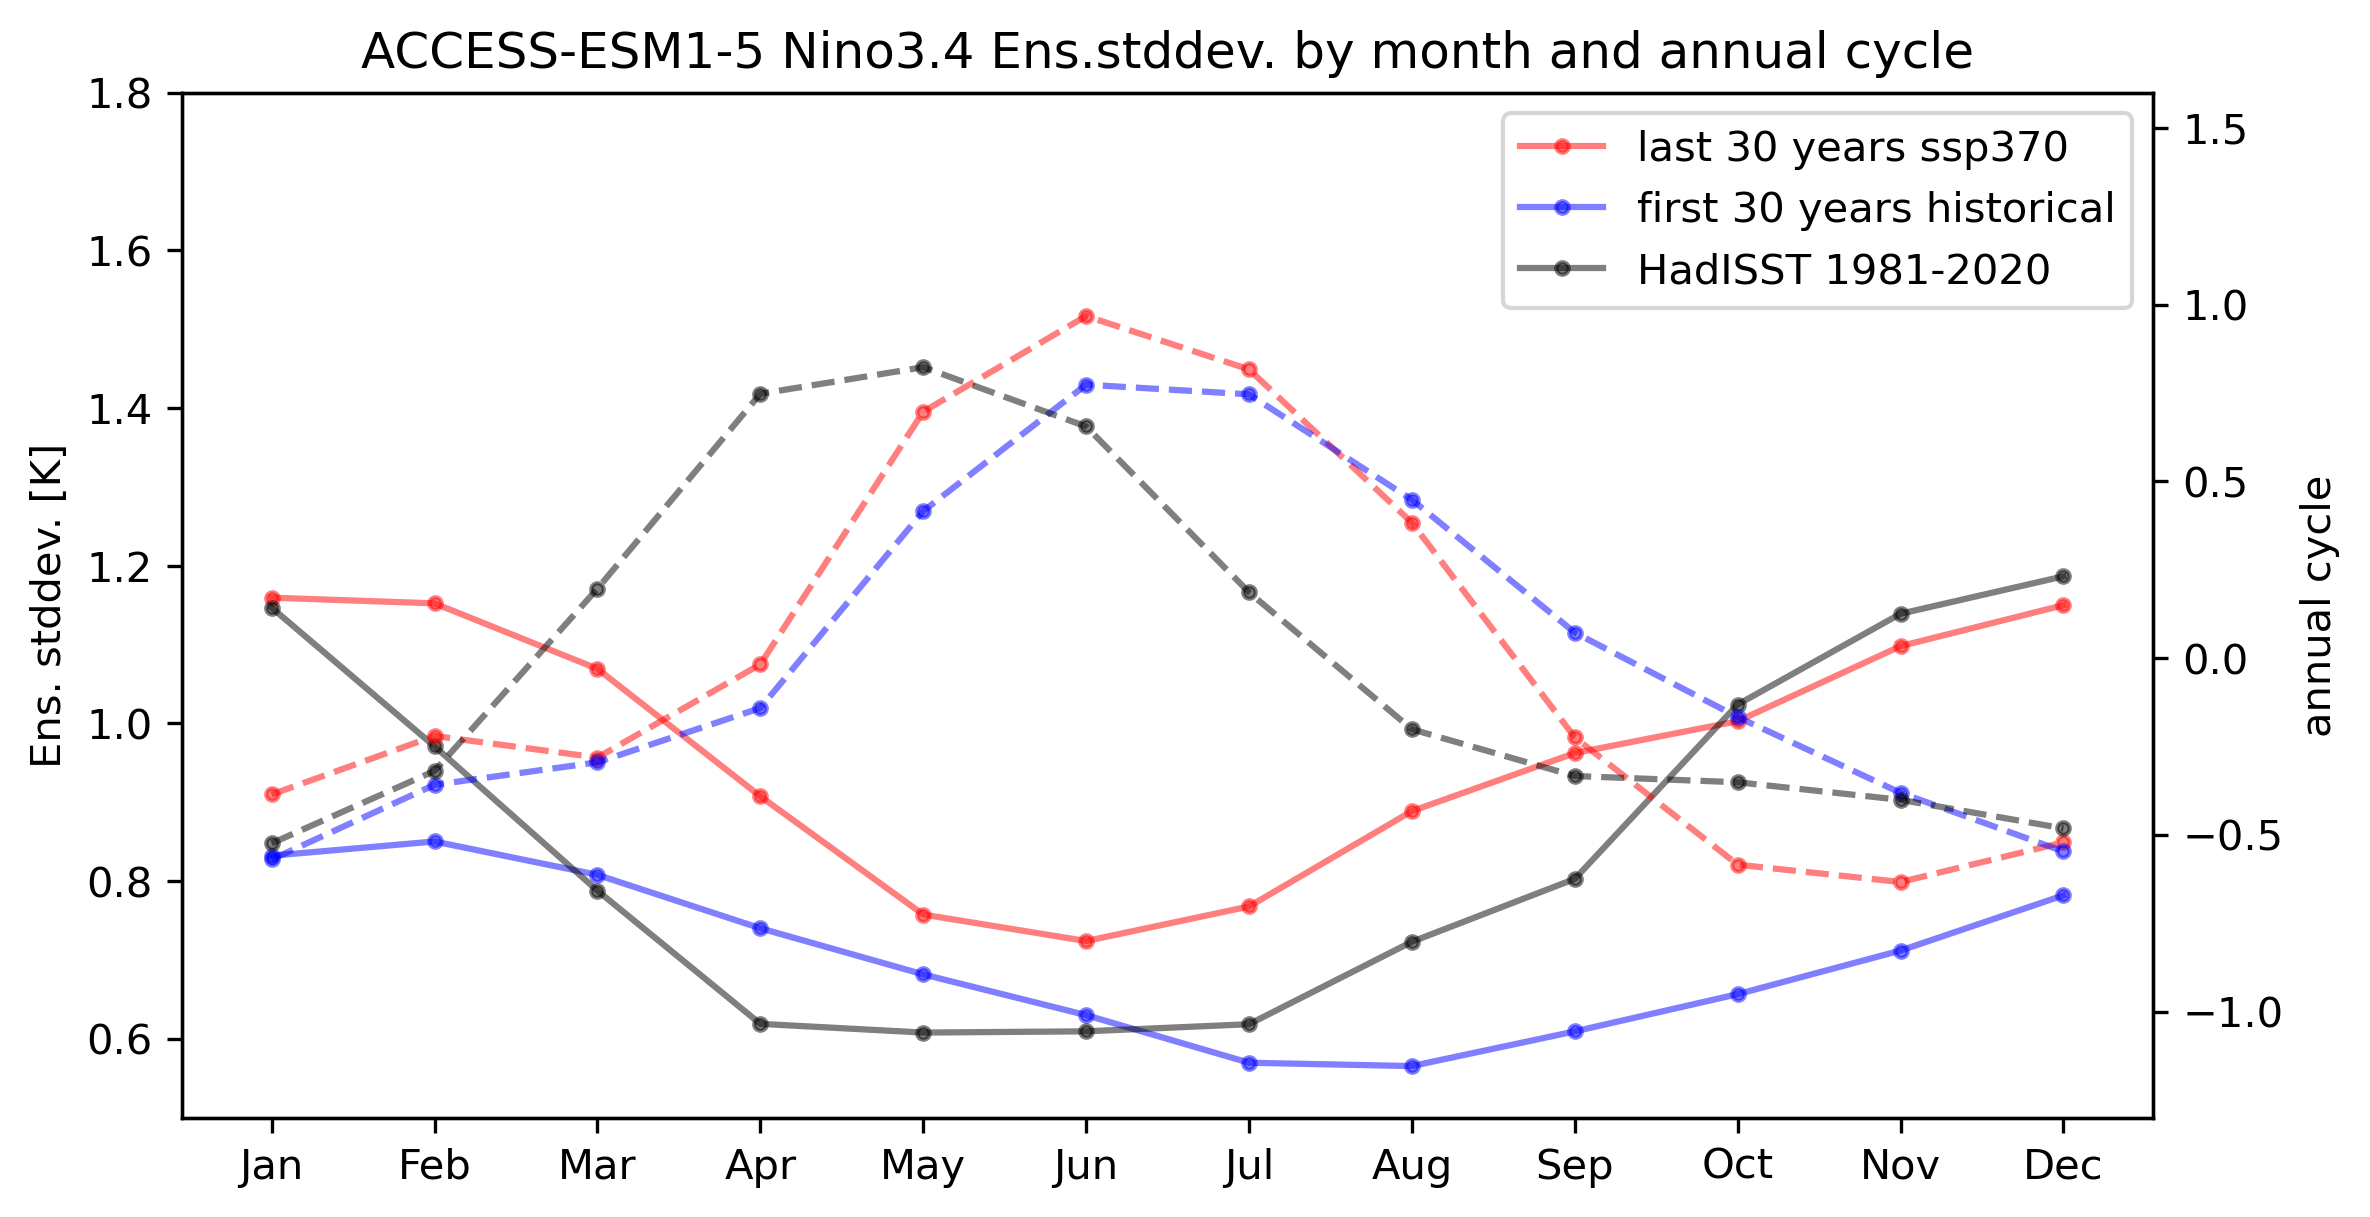

In [66]:

period_start= access_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end = access_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start= access_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-access_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end = access_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-access_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()
##########
fig, axes = plt.subplots(1,1, figsize=(8,4))

# left y axis
axes.set_ylabel('Ens. stddev. [K]')
axes.plot(np.arange(1,13,1), period_end, marker='.',color='red',alpha=0.5,label='last 30 years ssp370')
axes.plot(np.arange(1,13,1), period_start, marker='.',color='blue',alpha=0.5,label='first 30 years historical')
axes.plot(np.arange(1,13,1), hadisst_std, marker='.',color='black',alpha=0.5,label='HadISST 1981-2020')
axes.set_xticks(np.arange(1,13,1));
axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);


# right y axis
ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(1,13,1), mean_period_end, marker='.',linestyle='--',color='red',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), mean_period_start, marker='.',linestyle='--',color='blue',alpha=0.5,label='annual cycle')
ax2.plot(np.arange(1,13,1), hadisst_mean, marker='.',linestyle='--',color='black',alpha=0.5,label='annual cycle')
ax2.set_ylabel('annual cycle')
ax2.set_ylim(ylimrl,ylimrh)
axes.legend()

##

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


plt.title('ACCESS-ESM1-5 Nino3.4 Ens.stddev. by month and annual cycle')

plt.savefig(plotdir+'nino34_IV-mean-change_ACCESS-ESM1-5.png', bbox_inches='tight', dpi=300)

## synthesise

In [67]:
period_start1= cesm2_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end1 = cesm2_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start1= cesm2_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-cesm2_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end1 = cesm2_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-cesm2_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()

##
period_start2= canesm5_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end2 = canesm5_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start2= canesm5_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-canesm5_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end2 = canesm5_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-canesm5_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()

##
period_start3= miroc6_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end3 = miroc6_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start3= miroc6_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-miroc6_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end3 = miroc6_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-miroc6_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()

##
period_start4= ipsl_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end4 = ipsl_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start4= ipsl_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-ipsl_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end4 = ipsl_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-ipsl_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()

##
period_start5= cnrm_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end5 = cnrm_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start5= cnrm_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-cnrm_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end5 = cnrm_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-cnrm_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()

##

period_start6 = access_nino34_std_bymonth_array[:,5:35].mean(axis=1)
period_end6 = access_nino34_std_bymonth_array[:,-35:-5].mean(axis=1)

mean_period_start6 = access_nino34_mean_bymonth_array[:,0:30].mean(axis=1)-access_nino34_mean_bymonth_array[:,0:30].mean(axis=1).mean()
mean_period_end6 = access_nino34_mean_bymonth_array[:,-30:].mean(axis=1)-access_nino34_mean_bymonth_array[:,-30:].mean(axis=1).mean()



In [68]:
std_start_combined = np.array([period_start1,period_start2,period_start3,period_start4,period_start5,period_start6])
std_end_combined = np.array([period_end1,period_end2,period_end3,period_end4,period_end5,period_end6])

mean_start_combined = np.array([mean_period_start1,mean_period_start2,mean_period_start3,mean_period_start4,mean_period_start5,mean_period_start6])
mean_end_combined = np.array([mean_period_end1,mean_period_end2,mean_period_end3,mean_period_end4,mean_period_end5,mean_period_end6])

In [69]:
std_diff = std_end_combined-std_start_combined

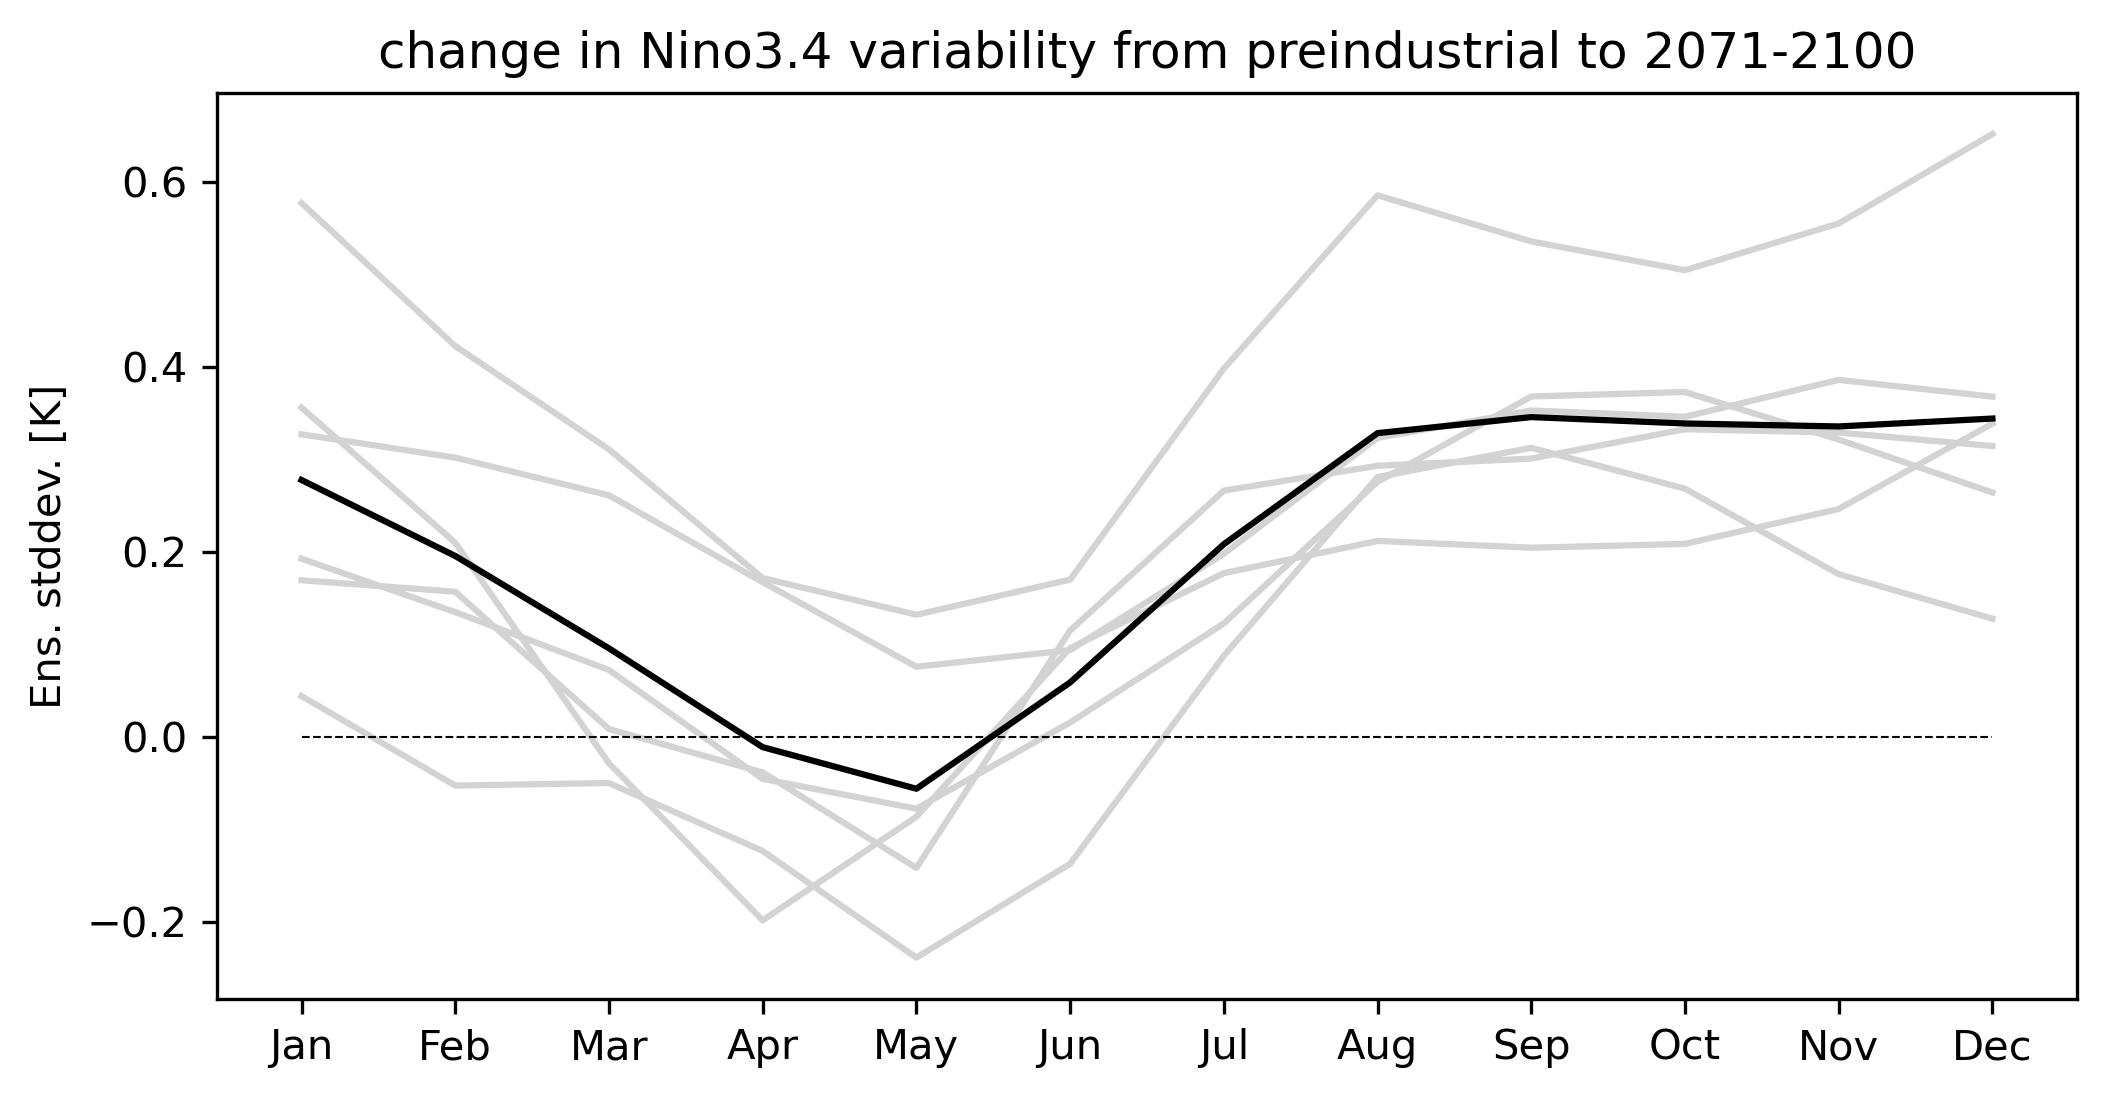

In [70]:
fig, axes = plt.subplots(1,1, figsize=(8,4))

axes.plot(np.arange(1,13,1),std_diff.transpose(),color='lightgrey')
axes.plot(np.arange(1,13,1),std_diff.mean(axis=0),color='black')
axes.plot(np.arange(1,13,1),np.zeros(12),color='black',linewidth=0.5,linestyle='--')

axes.set_ylabel('Ens. stddev. [K]')
axes.set_xticks(np.arange(1,13,1));
# axes.set_ylim(ylimll,ylimlh)
axes.set_xticklabels(Months);

plt.title('change in Nino3.4 variability from preindustrial to 2071-2100')

plt.savefig(plotdir+'summary_stddev_change.png', bbox_inches='tight', dpi=300)